# Aproximació 2

## Carrega de dades i llibreries

In [1]:
%pylab inline
%matplotlib inline
%load_ext autoreload
%autoreload 2

# No volem gaires warnings
import warnings 
warnings.filterwarnings("ignore")

# Importem panda, numpy i seaborn
import pandas as pd
pd.options.display.max_rows = 999

import numpy as np
import seaborn as sb
sb.set(style="white", color_codes=True)

# També matplotlib, important per a fer gràfiques
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import glob

# Afegim Columnes

columns = [ 'id',
            'lliga',
            'temp',
            'temp_id',
            'date',
            'hour',
            'round',
            'result',
            'attendance',
            'chairman_local',
            'chairman_visitor',
            'local_coach',
            'visitor_coach',
            'referee',
            'seats',
            'temperature',
            'weather',
            'localId',
            'local_goals',
            'LALGS',
            'LALGR',
            'player_local_1',
            'player_local_2',
            'player_local_3',
            'player_local_4',
            'player_local_5',
            'player_local_6',
            'player_local_7',
            'player_local_8',
            'player_local_9',
            'player_local_10',
            'player_local_11',
            'local_wins',
            'local_losses',
            'local_draws',
            'local_ga',
            'local_gf',
            'local_avg',
            'local_form',
            'local_mark',
            'local_points',
            'visitorId',
            'visitor_goals',
            'VAVGS',
            'VAVGR',
            'player_visitor_1',
            'player_visitor_2',
            'player_visitor_3',
            'player_visitor_4',
            'player_visitor_5',
            'player_visitor_6',
            'player_visitor_7',
            'player_visitor_8',
            'player_visitor_9',
            'player_visitor_10',
            'player_visitor_11',
            'visitor_wins',
            'visitor_losses',
            'visitor_draws',
            'visitor_ga',
            'visitor_gf',
            'visitor_avg',
            'visitor_form',
            'visitor_mark',
            'visitor_points'
]

full_data_set = pd.DataFrame(columns=columns)

# Carreguem el fitxer de l'aproximació 1 (en aquest cas no fa falta concatenarlo amb cap més)
for fname in glob.glob("../TF_data/2-aprox2.csv"):
    print ('Processing', fname)
    df = pd.read_csv(fname, 
                     sep=";", 
                     header=1,
                     names= columns,
                     na_values=['?'])

    df.set_index(keys = 'id', inplace = True)
    full_data_set = pd.concat([full_data_set, df],axis=0)
# Establim l'index    
    full_data_set['id'] = full_data_set.index
# I les dates com a datetime    
    full_data_set['date'] = pd.to_datetime(full_data_set.date)

print('Finished')

print 'Total', full_data_set.shape[0], 'partits'


Populating the interactive namespace from numpy and matplotlib
('Processing', '../TF_data/2-aprox2.csv')
Finished
Total 2510 partits


## Análisis i manipulació de les dades

In [2]:
full_data_set.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
LALGR,2375,1991,1,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LALGS,2375,2049,1,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VAVGR,2375,2058,1,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VAVGS,2375,1995,1,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
attendance,704,NaN,NaN,NaN,NaN,NaN,28587.1,18861.8,0,14956,23113,35000,98761
chairman_local,2510,68,Josep Maria Bartomeu,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chairman_visitor,2510,68,Abdullah Ben Nasser Al Thanis,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date,2510,446,2014-05-02 22:00:00,20,2012-08-17 22:00:00,2015-05-23 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hour,2510,NaN,NaN,NaN,NaN,NaN,17.5203,2.70913,12,15,17,20,23
id,2510,NaN,NaN,NaN,NaN,NaN,1258.56,725.974,2,630.25,1258.5,1886.75,2516


In [3]:
# Plot de les dades, observem les distrucións (ens fixem sempre en la variable 'result' que es el nostre objectiu)
#sb.pairplot(full_data_set.dropna(), hue='result')

In [4]:
#Afegim els gols marcats i rebuts de les ultimes jornades
full_data_set['local_goals_r_1'] = full_data_set['LALGR'].str.split('-').str[0].convert_objects(convert_numeric=True)
full_data_set['local_goals_r_2'] = full_data_set['LALGR'].str.split('-').str[1].convert_objects(convert_numeric=True)
full_data_set['local_goals_r_3'] = full_data_set['LALGR'].str.split('-').str[2].convert_objects(convert_numeric=True)
full_data_set['local_goals_r_4'] = full_data_set['LALGR'].str.split('-').str[3].convert_objects(convert_numeric=True)

full_data_set['local_goals_s_1'] = full_data_set['LALGS'].str.split('-').str[0].convert_objects(convert_numeric=True)
full_data_set['local_goals_s_2'] = full_data_set['LALGS'].str.split('-').str[1].convert_objects(convert_numeric=True)
full_data_set['local_goals_s_3'] = full_data_set['LALGS'].str.split('-').str[2].convert_objects(convert_numeric=True)
full_data_set['local_goals_s_4'] = full_data_set['LALGS'].str.split('-').str[3].convert_objects(convert_numeric=True)

full_data_set['visitor_goals_r_1'] = full_data_set['VAVGR'].str.split('-').str[0].convert_objects(convert_numeric=True)
full_data_set['visitor_goals_r_2'] = full_data_set['VAVGR'].str.split('-').str[1].convert_objects(convert_numeric=True)
full_data_set['visitor_goals_r_3'] = full_data_set['VAVGR'].str.split('-').str[2].convert_objects(convert_numeric=True)
full_data_set['visitor_goals_r_4'] = full_data_set['VAVGR'].str.split('-').str[3].convert_objects(convert_numeric=True)

full_data_set['visitor_goals_s_1'] = full_data_set['VAVGS'].str.split('-').str[0].convert_objects(convert_numeric=True)
full_data_set['visitor_goals_s_2'] = full_data_set['VAVGS'].str.split('-').str[1].convert_objects(convert_numeric=True)
full_data_set['visitor_goals_s_3'] = full_data_set['VAVGS'].str.split('-').str[2].convert_objects(convert_numeric=True)
full_data_set['visitor_goals_s_4'] = full_data_set['VAVGS'].str.split('-').str[3].convert_objects(convert_numeric=True)


In [5]:
# També afegim les victories o derrotes de les jornades anteriors

#full_data_set['local_result_0'] = full_data_set['local_form'].str[0]
full_data_set['local_result_1'] = full_data_set['local_form'].str[1]
full_data_set['local_result_2'] = full_data_set['local_form'].str[2]
full_data_set['local_result_3'] = full_data_set['local_form'].str[3]
full_data_set['local_result_4'] = full_data_set['local_form'].str[4]

#full_data_set['local_result_0'] = full_data_set['local_form'].str[0]
full_data_set['visitor_result_1'] = full_data_set['visitor_form'].str[1]
full_data_set['visitor_result_2'] = full_data_set['visitor_form'].str[2]
full_data_set['visitor_result_3'] = full_data_set['visitor_form'].str[3]
full_data_set['visitor_result_4'] = full_data_set['visitor_form'].str[4]

In [6]:
# Les transformem en numerals (igual que result) 
full_data_set = full_data_set.replace('l',0)
full_data_set = full_data_set.replace('d',1)
full_data_set = full_data_set.replace('w',2)

In [7]:
#Eliminem les dades que no podrem reproduir
full_data_set = full_data_set.drop('id', 1)
full_data_set = full_data_set.drop('date', 1)
full_data_set = full_data_set.drop('local_form', 1)
full_data_set = full_data_set.drop('visitor_form', 1)
full_data_set = full_data_set.drop('local_mark', 1)
full_data_set = full_data_set.drop('visitor_mark', 1)
full_data_set = full_data_set.drop('visitor_goals', 1)
full_data_set = full_data_set.drop('local_goals', 1)

full_data_set = full_data_set.drop('LALGR', 1)
full_data_set = full_data_set.drop('LALGS', 1)
full_data_set = full_data_set.drop('VAVGR', 1)
full_data_set = full_data_set.drop('VAVGS', 1)

In [8]:
#Num de features amb les que jugarem
full_data_set.columns.size

77

In [9]:
#Hi han nulls??
full_data_set.isnull().any().any()

True

In [10]:
# Els reemplaçem per -1 (només son de resultats de jornades anteriors. Per exemple quan no n'hi ha cap!, jornada1)
full_data_set = full_data_set.fillna(0)

In [11]:
#Hi han nulls 2??
full_data_set.isnull().any().any()

False

In [12]:
#Observem que totes les dades semblen raonables (i tenen una distribució mes o menys raonable)
full_data_set.describe().T

,count,mean,std,min,25%,50%,75%,max
attendance,2510.0,8018.051394,16268.752075,0.0,0.00,0.0,10699.25,98761.0
hour,2510.0,17.520319,2.709126,12.0,15.00,17.0,20.00,23.0
lliga,2510.0,5.431873,4.103477,1.0,1.00,8.0,10.00,10.0
localId,2510.0,29.538247,19.227963,1.0,12.00,27.0,46.00,68.0
local_avg,2510.0,-0.219920,17.033395,-45.0,-9.00,-2.0,4.00,89.0
local_draws,2510.0,4.236653,3.083237,0.0,2.00,4.0,6.00,16.0
local_ga,2510.0,25.126693,16.695187,0.0,11.00,24.0,37.00,83.0
local_gf,2510.0,24.906773,18.827807,0.0,11.00,22.0,35.00,111.0
local_losses,2510.0,6.938247,5.223480,0.0,3.00,6.0,11.00,24.0
local_points,2510.0,24.747410,18.172723,0.0,10.00,22.0,35.00,97.0


## Preprocessament

In [13]:
from sklearn import preprocessing 
#No podem tenir cadenes de caracters, per tant creeem diccionaris que es corresponen a les paraules

#Fem un diccionari per al temps
lweather = preprocessing.LabelEncoder()
lweather.fit(full_data_set['weather'])
list(lweather.classes_)
full_data_set['weather'] = lweather.transform(full_data_set['weather']) 
#list(lweather.inverse_transform(full_data_set['weather']))

#Fem un diccionari per als entrenadors, directius i arbitre
lchairman_local = preprocessing.LabelEncoder()
lchairman_local.fit(full_data_set['chairman_local'])
list(lchairman_local.classes_)
full_data_set['chairman_local'] = lchairman_local.transform(full_data_set['chairman_local']) 
#list(lweather.inverse_transform(full_data_set['weather']))

lchairman_visitor = preprocessing.LabelEncoder()
lchairman_visitor.fit(full_data_set['chairman_visitor'])
list(lchairman_visitor.classes_)
full_data_set['chairman_visitor'] = lchairman_visitor.transform(full_data_set['chairman_visitor']) 
#list(lweather.inverse_transform(full_data_set['weather']))

lvisitor_coach = preprocessing.LabelEncoder()
lvisitor_coach.fit(full_data_set['visitor_coach'])
list(lvisitor_coach.classes_)
full_data_set['visitor_coach'] = lvisitor_coach.transform(full_data_set['visitor_coach']) 
#list(lweather.inverse_transform(full_data_set['weather']))

llocal_coach = preprocessing.LabelEncoder()
llocal_coach.fit(full_data_set['local_coach'])
list(llocal_coach.classes_)
full_data_set['local_coach'] = llocal_coach.transform(full_data_set['local_coach']) 
#list(lweather.inverse_transform(full_data_set['weather']))

#I arbitre
lreferee = preprocessing.LabelEncoder()
lreferee.fit(full_data_set['referee'])
list(lreferee.classes_)
full_data_set['referee'] = lreferee.transform(full_data_set['referee']) 
#list(lweather.inverse_transform(full_data_set['weather']))


In [14]:
for col in full_data_set:
    print col,'\t\t\t\t', full_data_set[col].dtypes

attendance 				float64
chairman_local 				int64
chairman_visitor 				int64
hour 				float64
lliga 				float64
localId 				float64
local_avg 				float64
local_coach 				int64
local_draws 				float64
local_ga 				float64
local_gf 				float64
local_losses 				float64
local_points 				float64
local_wins 				float64
player_local_1 				float64
player_local_10 				float64
player_local_11 				float64
player_local_2 				float64
player_local_3 				float64
player_local_4 				float64
player_local_5 				float64
player_local_6 				float64
player_local_7 				float64
player_local_8 				float64
player_local_9 				float64
player_visitor_1 				float64
player_visitor_10 				float64
player_visitor_11 				float64
player_visitor_2 				float64
player_visitor_3 				float64
player_visitor_4 				float64
player_visitor_5 				float64
player_visitor_6 				float64
player_visitor_7 				float64
player_visitor_8 				float64
player_visitor_9 				float64
referee 				int64
result 				float64
round 				float64
seats 				fl

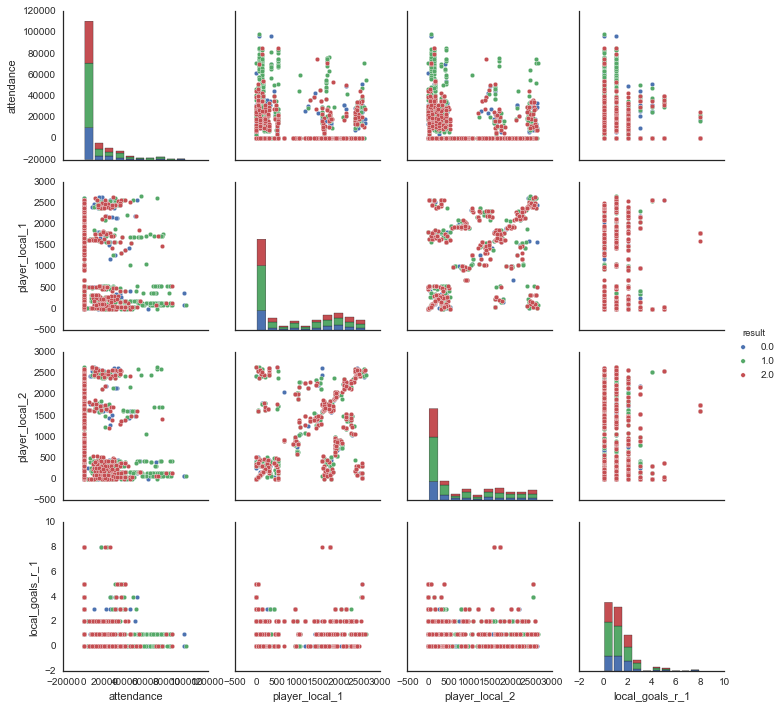

In [15]:
sb.pairplot(full_data_set.dropna(), vars=[ 'attendance',
            'player_local_1',
            'player_local_2',
            'local_goals_r_1'], hue='result')

### En aquest cas veiem com les ids dels jugadors, seiens i altres variables están molt allunyats de la norma, potser si que s'han d'escalar les dades i fer normalització. 

## Normalitzar

In [18]:
X_norm = preprocessing.normalize(full_data_set[feature_names], norm='l2')

## Construcció i análisis de resultats dels Models

In [19]:
# Definim la colmna objectiu (que volem predir)
y_name = 'result'
feature_names = full_data_set.columns.tolist()
feature_names.remove(y_name)

# Separem el data set entre totes les dades, i els resultats
X = X_norm
y = full_data_set[y_name]

### Separem entre train i test  

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import train_test_split

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(X, y, train_size=0.75, random_state=1301, stratify=y)

### Decision TREE

In [36]:
from sklearn.tree import DecisionTreeClassifier
# Creem el classificador
decision_tree_classifier = DecisionTreeClassifier(max_features= 64, max_depth= 2)

# Entrenem amb el training
decision_tree_classifier.fit(training_inputs, training_classes)

# Validem amb el test i mesurem resultats
dt_score = decision_tree_classifier.score(testing_inputs, testing_classes)
dt_mse = mean_squared_error(testing_classes, decision_tree_classifier.predict(testing_inputs))
print "Decision Tree Score: %.4f"  % dt_score, "\nMSE: %.4f" % dt_mse 

Decision Tree Score: 0.5111 
MSE: 0.6035


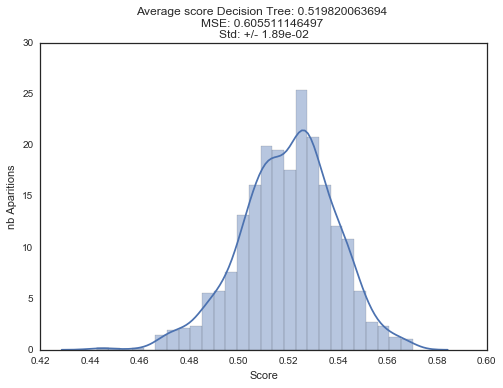

In [37]:
dt_scores = []
dt_mses = []

#Fem el mateix peró amb diversos subsets training/test (hauria de sortir una distribució normal)
for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(X, y, train_size=0.75)
    
    decision_tree_classifier = DecisionTreeClassifier(max_features= 64, max_depth= 2)
    decision_tree_classifier.fit(training_inputs, training_classes)
    dt_score = decision_tree_classifier.score(testing_inputs, testing_classes)
    dt_mse = mean_squared_error(testing_classes, decision_tree_classifier.predict(testing_inputs))
    dt_scores.append(dt_score)
    dt_mses.append(dt_mse)
    
plt.title('Average score Decision Tree: {} \nMSE: {} \nStd: +/- {:.2e}'.format(
        np.mean(dt_scores),  np.mean(dt_mses), np.std(dt_scores)))
plt.ylabel('nb Aparitions')
plt.xlabel('Score')

sb.distplot(dt_scores)

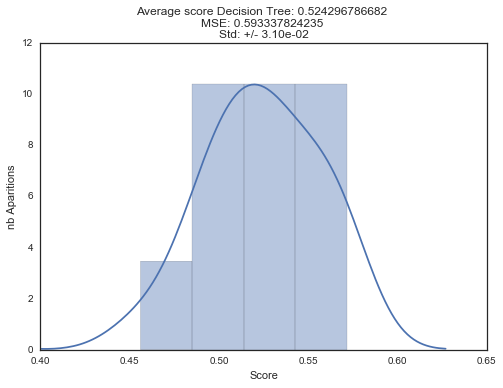

In [38]:
#Enlloc d'utilitzar training i test, provem crossvalidation 
from sklearn.cross_validation import cross_val_score

decision_tree_classifier = DecisionTreeClassifier(max_features= 64, max_depth= 2)

#Al igual que abans, hauria de retornar una distribució normal (utilitzo X i y directament!)
dt_scores = cross_val_score(decision_tree_classifier, X, y, cv=20)
dt_mses = cross_val_score(decision_tree_classifier, X, y, cv=20, scoring='mean_squared_error')

plt.title('Average score Decision Tree: {} \nMSE: {} \nStd: +/- {:.2e}'.format(
        np.mean(dt_scores), -np.mean(dt_mses), np.std(dt_scores)))
plt.ylabel('nb Aparitions')
plt.xlabel('Score')

sb.distplot(dt_scores)

In [20]:
decision_tree_classifier.get_params().keys()

['presort',
 'splitter',
 'max_leaf_nodes',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'criterion',
 'random_state',
 'max_features',
 'max_depth',
 'class_weight']

In [1]:
#Probem un algoritme que ajuda a decidir els millors parametres d'entrada'
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedKFold

decision_tree_classifier = DecisionTreeClassifier()


parameter_grid = {'max_depth': list(range(1,10)),
                  'max_features': list(range(1,77))}

cross_validation = StratifiedKFold(y, n_folds=20)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation,
                           verbose=10)

grid_search.fit(X, y)
print('Best score Decision Tree: {}'.format(grid_search.best_score_))
print('Best parameters Decision Tree: {}'.format(grid_search.best_params_))

#Resultats, per no embrutar la sortida (amb el verbose)
#Best score Decision Tree: 0.525896414343
#Best parameters Decision Tree: {'max_features': 64, 'max_depth': 2}

NameError: name 'DecisionTreeClassifier' is not defined

### KNN

#### Faig el mateix procés que abans però amb aquest metode

In [39]:
from sklearn import neighbors

# Creem el classificador
knn = neighbors.KNeighborsClassifier(n_neighbors=80, weights='distance')

# Entrenem amb el training
knn.fit(training_inputs, training_classes)

# Validem amb el test i mesurem resultats
knn_score = knn.score(testing_inputs, testing_classes)
knn_mse = mean_squared_error(testing_classes, knn.predict(testing_inputs))
print "Decision Tree Score: %.4f"  % knn_score, "\nMSE: %.4f" % knn_mse 

Decision Tree Score: 0.4952 
MSE: 0.6481


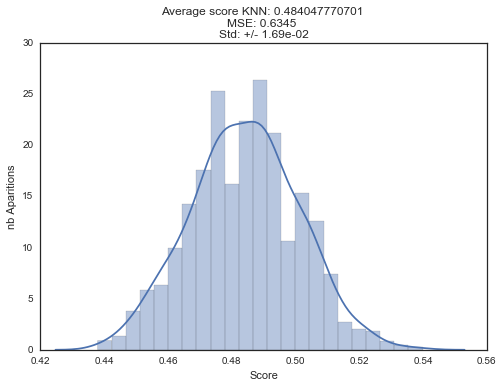

In [40]:
knn_scores = []
knn_mses = []

#Fem el mateix peró amb diversos subsets training/test (hauria de sortir una distribució normal)
for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(X, y, train_size=0.75)
    
    knn = neighbors.KNeighborsClassifier(n_neighbors= 80, weights= 'distance')
    knn.fit(training_inputs, training_classes)
    knn_score = knn.score(testing_inputs, testing_classes)
    knn_mse = mean_squared_error(testing_classes, knn.predict(testing_inputs))
    knn_scores.append(knn_score)
    knn_mses.append(knn_mse)
    
plt.title('Average score KNN: {} \nMSE: {} \nStd: +/- {:.2e}'.format(
        np.mean(knn_scores),  np.mean(knn_mses), np.std(knn_scores)))
plt.ylabel('nb Aparitions')
plt.xlabel('Score')

sb.distplot(knn_scores)

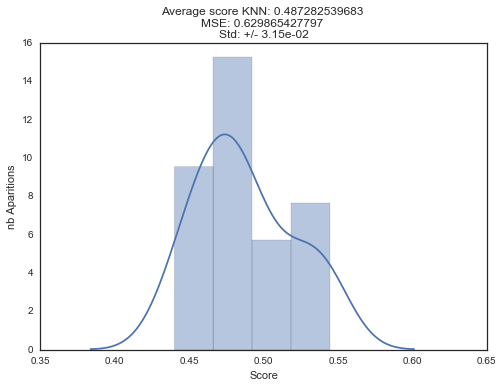

In [41]:
from sklearn.cross_validation import cross_val_score

#Enlloc d'utilitzar training i test, provem crossvalidation 
knn = neighbors.KNeighborsClassifier(n_neighbors= 80, weights= 'distance')

#Al igual que abans, hauria de retornar una distribució normal (utilitzo X i y directament!)
knn_scores = cross_val_score(knn, X, y, cv=20)
knn_mses = cross_val_score(knn, X, y, cv=20, scoring='mean_squared_error')

plt.title('Average score KNN: {} \nMSE: {} \nStd: +/- {:.2e}'.format(
        np.mean(knn_scores), -np.mean(knn_mses), np.std(knn_scores)))
plt.ylabel('nb Aparitions')
plt.xlabel('Score')

sb.distplot(knn_scores)

In [42]:
knn.get_params().keys()

['n_neighbors',
 'n_jobs',
 'algorithm',
 'metric',
 'metric_params',
 'p',
 'weights',
 'leaf_size']

In [47]:
#Probem un algoritme que ajuda a decidir els millors parametres d'entrada
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedKFold

knn = neighbors.KNeighborsClassifier()

parameter_grid = {'weights': ['uniform', 'distance'], 'n_neighbors': [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}


cross_validation = StratifiedKFold(y, n_folds=20)

grid_search = GridSearchCV(knn,
                           param_grid=parameter_grid,
                           cv=cross_validation,
                           )

grid_search.fit(X, y)
print('Best score KNN: {}'.format(grid_search.best_score_))
print('Best parameters KNN: {}'.format(grid_search.best_params_))

Best score KNN: 0.487250996016
Best parameters KNN: {'n_neighbors': 80, 'weights': 'distance'}


### SVM

In [48]:
from sklearn import svm

svmc = svm.SVC(kernel='rbf', C=1, gamma=0.0001)

svmc.fit(training_inputs, training_classes)

svmc_score = svmc.score(testing_inputs, testing_classes)
svmc_mse = mean_squared_error(testing_classes, svmc.predict(testing_inputs))
print "Support Vector Machine: %.4f"  % svmc_score, "\nMSE: %.4f" % svmc_mse 

Support Vector Machine: 0.4602 
MSE: 0.5398


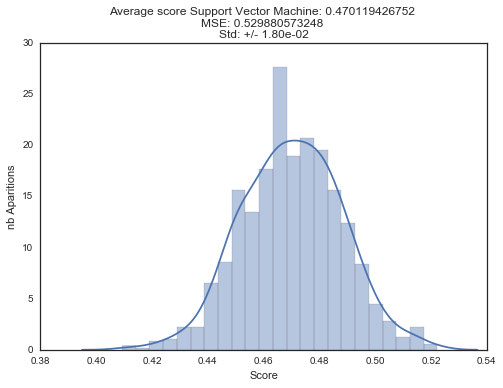

In [49]:
svmc_scores = []
svmc_mses = []

for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(X, y, train_size=0.75)
    
    svmc = svm.SVC(kernel='rbf', C=1, gamma=0.0001)
    svmc.fit(training_inputs, training_classes)
    svmc_score = svmc.score(testing_inputs, testing_classes)
    svmc_mse = mean_squared_error(testing_classes, svmc.predict(testing_inputs))
    svmc_scores.append(svmc_score)
    svmc_mses.append(svmc_mse)
    
plt.title('Average score Support Vector Machine: {} \nMSE: {} \nStd: +/- {:.2e}'.format(
        np.mean(svmc_scores),  np.mean(svmc_mses), np.std(svmc_scores)))
plt.ylabel('nb Aparitions')
plt.xlabel('Score')

sb.distplot(svmc_scores)

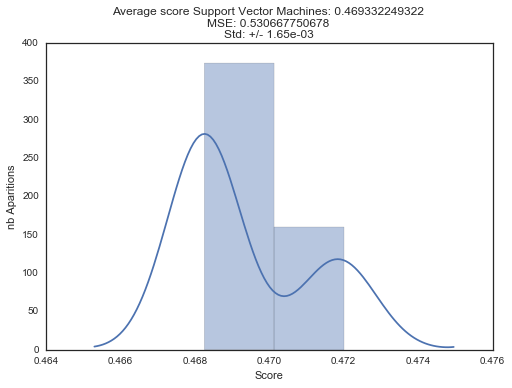

In [50]:
from sklearn.cross_validation import cross_val_score

svmc = svm.SVC(kernel='rbf', C=1, gamma=0.0001)

#Al igual que abans, hauria de retornar una distribució normal (utilitzo X i y directament!)
svmc_scores = cross_val_score(svmc, X, y, cv=20)
svmc_mses = cross_val_score(svmc, X, y, cv=20, scoring='mean_squared_error')

plt.title('Average score Support Vector Machines: {} \nMSE: {} \nStd: +/- {:.2e}'.format(
        np.mean(svmc_scores), -np.mean(svmc_mses), np.std(svmc_scores)))
plt.ylabel('nb Aparitions')
plt.xlabel('Score')

sb.distplot(svmc_scores)

In [52]:
svmc.get_params().keys()

['kernel',
 'C',
 'verbose',
 'probability',
 'degree',
 'shrinking',
 'max_iter',
 'decision_function_shape',
 'random_state',
 'tol',
 'cache_size',
 'coef0',
 'gamma',
 'class_weight']

In [ ]:
#Probem un algoritme que ajuda a decidir els millors parametres d'entrada
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedKFold

clf = svm.SVC()

parameter_grid = {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}

cross_validation = StratifiedKFold(y, n_folds=20)

grid_search = GridSearchCV(clf,
                           param_grid=parameter_grid,
                           cv=cross_validation,
                           n_jobs=4)

grid_search.fit(X, y)
print('Best score SVM: {}'.format(grid_search.best_score_))
print('Best parameters SVM: {}'.format(grid_search.best_params_))

### Logistic Regression

In [53]:
from sklearn import linear_model

logistic = linear_model.LogisticRegression(C=1e8)
    
logistic.fit(training_inputs, training_classes) 

lr_score = logistic.score(testing_inputs, testing_classes)
lr_mse = mean_squared_error(testing_classes, logistic.predict(testing_inputs))
print "Logistic regression Score: %.4f"  % lr_score, "\nMSE: %.4f" % lr_mse 

Logistic regression Score: 0.5207 
MSE: 0.6656


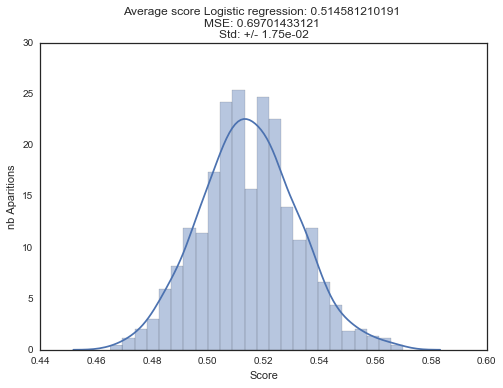

In [54]:
lr_scores = []
lr_mses = []

for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(X, y, train_size=0.75)
    
    logistic = linear_model.LogisticRegression(C=1e8)
    logistic.fit(training_inputs, training_classes)
    lr_score = logistic.score(testing_inputs, testing_classes)
    lr_mse = mean_squared_error(testing_classes, logistic.predict(testing_inputs))
    lr_scores.append(lr_score)
    lr_mses.append(lr_mse)
    
plt.title('Average score Logistic regression: {} \nMSE: {} \nStd: +/- {:.2e}'.format(
        np.mean(lr_scores),  np.mean(lr_mses), np.std(lr_scores)))
plt.ylabel('nb Aparitions')
plt.xlabel('Score')

sb.distplot(lr_scores)

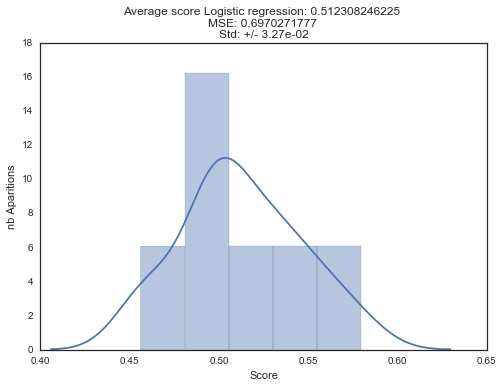

In [55]:
from sklearn.cross_validation import cross_val_score

logistic = linear_model.LogisticRegression(C=1e8)

#Al igual que abans, hauria de retornar una distribució normal (utilitzo X i y directament!)
lr_scores = cross_val_score(logistic, X, y, cv=20)
lr_mses = cross_val_score(logistic, X, y, cv=20, scoring='mean_squared_error')

plt.title('Average score Logistic regression: {} \nMSE: {} \nStd: +/- {:.2e}'.format(
        np.mean(lr_scores), -np.mean(lr_mses), np.std(lr_scores)))
plt.ylabel('nb Aparitions')
plt.xlabel('Score')

sb.distplot(lr_scores)

In [56]:
logistic.get_params().keys()

['warm_start',
 'C',
 'n_jobs',
 'verbose',
 'intercept_scaling',
 'fit_intercept',
 'max_iter',
 'penalty',
 'multi_class',
 'random_state',
 'dual',
 'tol',
 'solver',
 'class_weight']

In [ ]:
#Probem un algoritme que ajuda a decidir els millors parametres d'entrada
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedKFold

logistic = linear_model.LogisticRegression()

parameter_grid = {'C': numpy.linspace(0.01,1000,100)},

cross_validation = StratifiedKFold(y, n_folds=20)

grid_search = GridSearchCV(logistic,
                           param_grid=parameter_grid,
                           cv=cross_validation
                           )

grid_search.fit(X, y)
print('Best score Logistic Regression: {}'.format(grid_search.best_score_))
print('Best parameters Logistic Regression: {}'.format(grid_search.best_params_))

#### Fem unes quantes proves més.

## Multiples proves

Model scores
ada_boost     0.507607
bagging       0.465642
extra_tree    0.467383
forest        0.453685
gaussian      0.476114
grad_boost    0.523954
passive       0.401894
ridge         0.488015
sgd           0.405206
tree          0.423556
xgboost       0.505551
dtype: float64


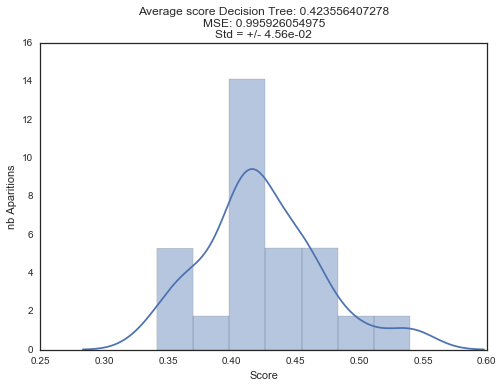

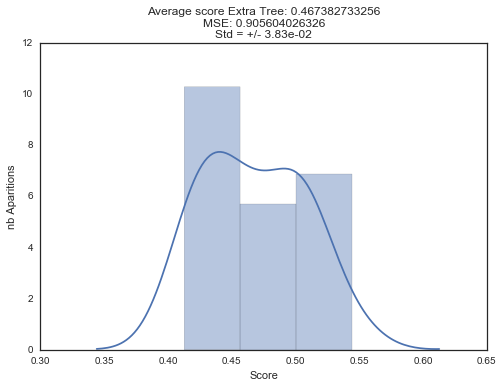

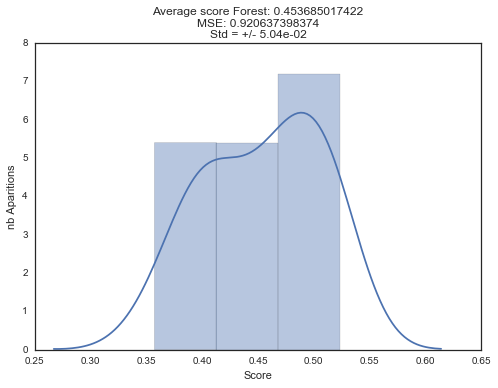

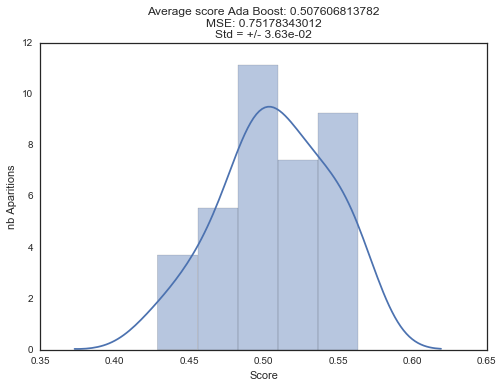

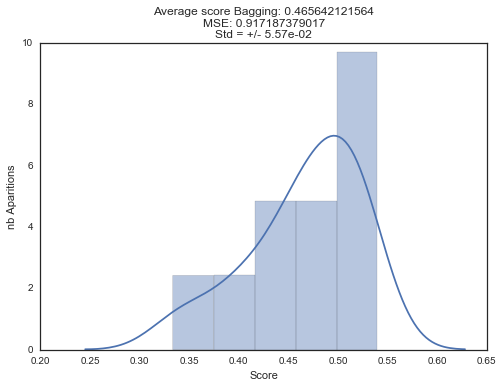

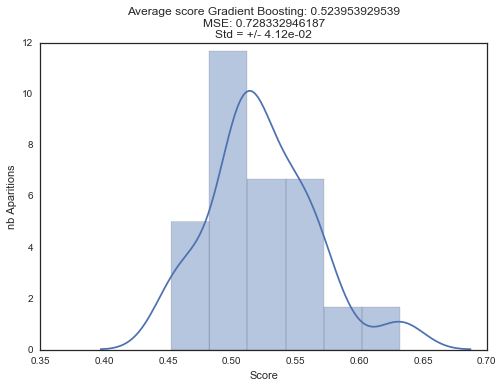

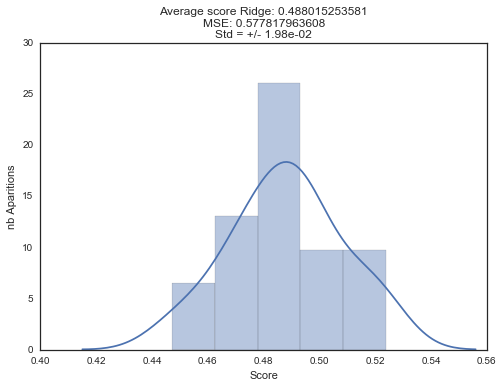

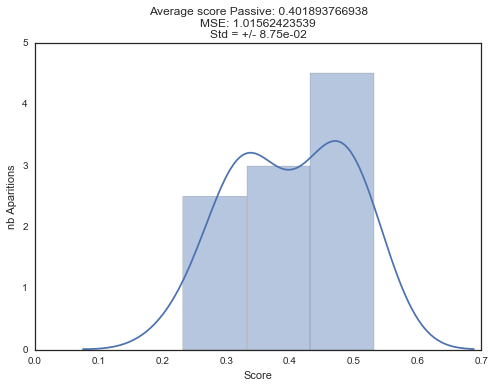

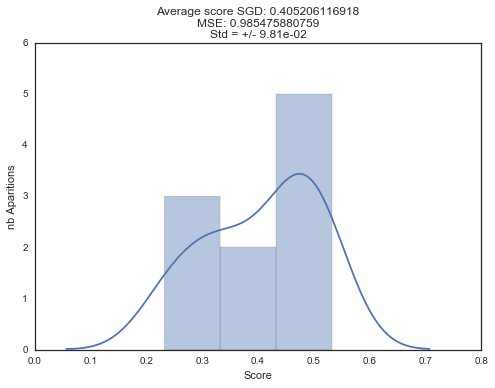

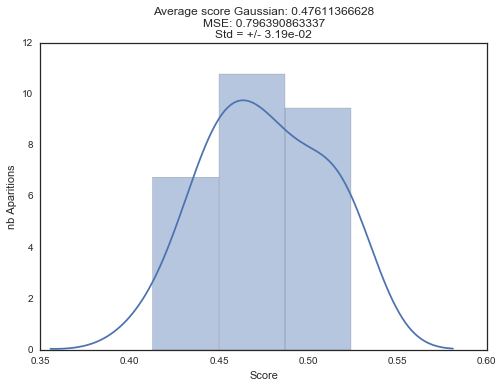

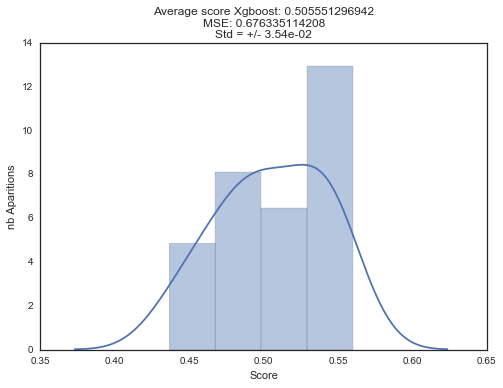

In [22]:
from sklearn import cross_validation as cv
from sklearn import tree
from sklearn import metrics
from sklearn import ensemble
from sklearn import linear_model 
from sklearn import naive_bayes 
import xgboost as xgb

skf = cv.StratifiedKFold(y, n_folds=20, shuffle=True)
scores = {}
mses = {}

def score_model(model):
    return cv.cross_val_score(model, X, y, cv=skf, n_jobs=4)

def mse_model(model):
    return cv.cross_val_score(model, X, y, cv=skf, n_jobs=4, scoring='mean_squared_error')

#Decision Tree
scores['tree'] = score_model(tree.DecisionTreeClassifier()) 
mses['tree'] = mse_model(tree.DecisionTreeClassifier())
plt.figure()
sb.distplot(scores['tree'])
plt.title('Average score Decision Tree: {}\nMSE: {}\nStd = +/- {:.2e}'.format(
        np.mean(scores['tree']), -np.mean(mses['tree']), np.std(scores['tree'])))
plt.ylabel('nb Aparitions')
plt.xlabel('Score')

#Extra Tree
scores['extra_tree'] = score_model(ensemble.ExtraTreesClassifier())
mses['extra_tree'] = mse_model(ensemble.ExtraTreesClassifier())
plt.figure()
sb.distplot(scores['extra_tree'])
plt.title('Average score Extra Tree: {}\nMSE: {}\nStd = +/- {:.2e}'.format(
        np.mean(scores['extra_tree']), -np.mean(mses['extra_tree']), np.std(scores['extra_tree'])))
plt.ylabel('nb Aparitions')
plt.xlabel('Score')

scores['forest'] = score_model(ensemble.RandomForestClassifier())
mses['forest'] = mse_model(ensemble.RandomForestClassifier())
plt.figure()
sb.distplot(scores['forest'])
plt.title('Average score Forest: {}\nMSE: {}\nStd = +/- {:.2e}'.format(
        np.mean(scores['forest']), -np.mean(mses['forest']), np.std(scores['forest'])))
plt.ylabel('nb Aparitions')
plt.xlabel('Score')

scores['ada_boost'] = score_model(ensemble.AdaBoostClassifier())
mses['ada_boost'] = mse_model(ensemble.AdaBoostClassifier())
plt.figure()
sb.distplot(scores['ada_boost'])
plt.title('Average score Ada Boost: {}\nMSE: {}\nStd = +/- {:.2e}'.format(
        np.mean(scores['ada_boost']), -np.mean(mses['ada_boost']), np.std(scores['ada_boost'])))
plt.ylabel('nb Aparitions')
plt.xlabel('Score')

scores['bagging'] = score_model(ensemble.BaggingClassifier())
mses['bagging'] = mse_model(ensemble.BaggingClassifier())
plt.figure()
sb.distplot(scores['bagging'])
plt.title('Average score Bagging: {}\nMSE: {}\nStd = +/- {:.2e}'.format(
        np.mean(scores['bagging']), -np.mean(mses['bagging']), np.std(scores['bagging'])))
plt.ylabel('nb Aparitions')
plt.xlabel('Score')

scores['grad_boost'] = score_model(ensemble.GradientBoostingClassifier())
mses['grad_boost'] = mse_model(ensemble.GradientBoostingClassifier())
plt.figure()
sb.distplot(scores['grad_boost'])
plt.title('Average score Gradient Boosting: {}\nMSE: {}\nStd = +/- {:.2e}'.format(
        np.mean(scores['grad_boost']), -np.mean(mses['grad_boost']), np.std(scores['grad_boost'])))
plt.ylabel('nb Aparitions')
plt.xlabel('Score')

scores['ridge'] = score_model(linear_model.RidgeClassifier())
mses['ridge'] = mse_model(linear_model.RidgeClassifier())
plt.figure()
sb.distplot(scores['ridge'])
plt.title('Average score Ridge: {}\nMSE: {}\nStd = +/- {:.2e}'.format(
        np.mean(scores['ridge']), -np.mean(mses['ridge']), np.std(scores['ridge'])))
plt.ylabel('nb Aparitions')
plt.xlabel('Score')

scores['passive'] = score_model(linear_model.PassiveAggressiveClassifier())
mses['passive'] = mse_model(linear_model.PassiveAggressiveClassifier())
plt.figure()
sb.distplot(scores['passive'])
plt.title('Average score Passive: {}\nMSE: {}\nStd = +/- {:.2e}'.format(
        np.mean(scores['passive']), -np.mean(mses['passive']), np.std(scores['passive'])))
plt.ylabel('nb Aparitions')
plt.xlabel('Score')

scores['sgd'] = score_model(linear_model.SGDClassifier())
mses['sgd'] = mse_model(linear_model.SGDClassifier())
plt.figure()
sb.distplot(scores['sgd'])
plt.title('Average score SGD: {}\nMSE: {}\nStd = +/- {:.2e}'.format(
        np.mean(scores['sgd']), -np.mean(mses['sgd']), np.std(scores['sgd'])))
plt.ylabel('nb Aparitions')
plt.xlabel('Score')

scores['gaussian'] = score_model(naive_bayes.GaussianNB())
mses['gaussian'] = mse_model(naive_bayes.GaussianNB())
plt.figure()
sb.distplot(scores['gaussian'])
plt.title('Average score Gaussian: {}\nMSE: {}\nStd = +/- {:.2e}'.format(
        np.mean(scores['gaussian']), -np.mean(mses['gaussian']), np.std(scores['gaussian'])))
plt.ylabel('nb Aparitions')
plt.xlabel('Score')

scores['xgboost'] = score_model(xgb.XGBClassifier())
mses['xgboost'] = mse_model(xgb.XGBClassifier())
plt.figure()
sb.distplot(scores['xgboost'])
plt.title('Average score Xgboost: {}\nMSE: {}\nStd = +/- {:.2e}'.format(
        np.mean(scores['xgboost']), -np.mean(mses['xgboost']), np.std(scores['xgboost'])))
plt.ylabel('nb Aparitions')
plt.xlabel('Score')

# Print the scores
model_scores = pd.DataFrame(scores).mean()

print('Model scores\n{}'.format(model_scores))

### XGBOOST

In [22]:
import xgboost as xgb

xgbo = xgb.XGBClassifier()

xgbo.fit(training_inputs, training_classes,  eval_metric="auc")

xgbo_score = xgbo.score(testing_inputs, testing_classes)
xgbo_mse = mean_squared_error(testing_classes, xgbo.predict(testing_inputs))
print "XGBOOST Score: %.4f"  % xgbo_score, "\nMSE: %.4f" % xgbo_mse 

XGBOOST Score: 0.5024 
MSE: 0.7170


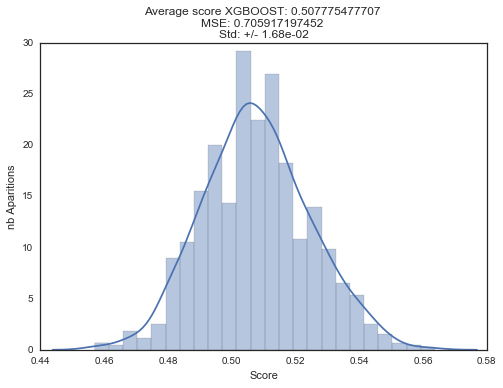

In [23]:
xgbo_scores = []
xgbo_mses = []

for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(X, y, train_size=0.75)
    
    xgbo.fit(training_inputs, training_classes)
    xgbo_score = xgbo.score(testing_inputs, testing_classes)
    xgbo_mse = mean_squared_error(testing_classes, xgbo.predict(testing_inputs))
    xgbo_scores.append(xgbo_score)
    xgbo_mses.append(xgbo_mse)

    
plt.title('Average score XGBOOST: {} \nMSE: {} \nStd: +/- {:.2e}'.format(
        np.mean(xgbo_scores),  np.mean(xgbo_mses), np.std(xgbo_scores)))
plt.ylabel('nb Aparitions')
plt.xlabel('Score')

sb.distplot(xgbo_scores)

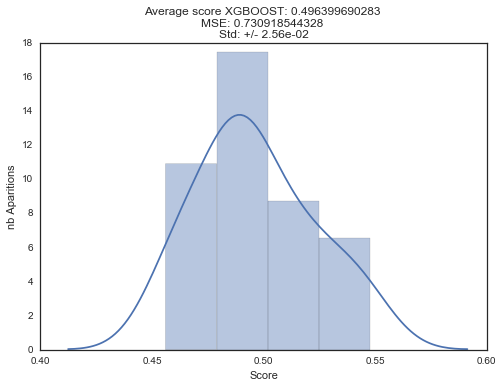

In [24]:
from sklearn.cross_validation import cross_val_score

#Al igual que abans, hauria de retornar una distribució normal (utilitzo X i y directament!)
xgbo_scores = cross_val_score(xgbo, X, y, cv=20)
xgbo_mses = cross_val_score(xgbo, X, y, cv=20, scoring='mean_squared_error')

plt.title('Average score XGBOOST: {} \nMSE: {} \nStd: +/- {:.2e}'.format(
        np.mean(xgbo_scores), -np.mean(xgbo_mses), np.std(xgbo_scores)))
plt.ylabel('nb Aparitions')
plt.xlabel('Score')

sb.distplot(xgbo_scores)

In [25]:
xgbo.get_params().keys()

['reg_alpha',
 'colsample_bytree',
 'silent',
 'colsample_bylevel',
 'scale_pos_weight',
 'learning_rate',
 'missing',
 'max_delta_step',
 'nthread',
 'base_score',
 'n_estimators',
 'subsample',
 'reg_lambda',
 'seed',
 'min_child_weight',
 'objective',
 'max_depth',
 'gamma']

In [2]:
#Probem un algoritme que ajuda a decidir els millors parametres d'entrada
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedKFold

xgbo = xgb.XGBClassifier()

parameter_grid = {
    'learning_rate': [0.05, 0.1, 0.3],
    'max_depth': [5, 6, 9, 12],
    'subsample': [0.9, 1.0],
    'colsample_bytree': [0.9, 1.0],
    'n_estimators': [100,200,400,500]
}
 

cross_validation = StratifiedKFold(y, n_folds=20)

grid_search = GridSearchCV(xgbo,
                           param_grid=parameter_grid,
                           cv=cross_validation
                           )

grid_search.fit(X, y)
print('Best score XGBOOST: {}'.format(grid_search.best_score_))
print('Best parameters XGBOOST: {}'.format(grid_search.best_params_))


NameError: name 'xgb' is not defined

### Random forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(bootstrap= True, min_samples_leaf= 9, 
                            n_estimators= 310, min_samples_split= 4, 
                            criterion= 'gini', max_features= 17, max_depth= 6)

rf.fit(training_inputs, training_classes)

rf_score = rf.score(testing_inputs, testing_classes)
rf_mse = mean_squared_error(testing_classes, rf.predict(testing_inputs))
print "Random Forest Score: %.4f"  % rf_score, "\nMSE: %.4f" % rf_mse 

Random Forest Score: 0.5326 
MSE: 0.6296


In [ ]:
rf_scores = []
rf_mses = []

#Fem el mateix peró amb diversos subsets training/test (hauria de sortir una distribució normal)
for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(X, y, train_size=0.75)
    
    rf.fit(training_inputs, training_classes)
    rf_score = rf.score(testing_inputs, testing_classes)
    rf_mse = mean_squared_error(testing_classes, rf.predict(testing_inputs))
    rf_scores.append(rf_score)
    rf_mses.append(rf_mse)
    
plt.title('Average score Random Forest: {} \nMSE: {} \nStd: +/- {:.2e}'.format(
        np.mean(rf_scores),  np.mean(rf_mses), np.std(rf_scores)))
plt.ylabel('nb Aparitions')
plt.xlabel('Score')

sb.distplot(rf_scores)

/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8

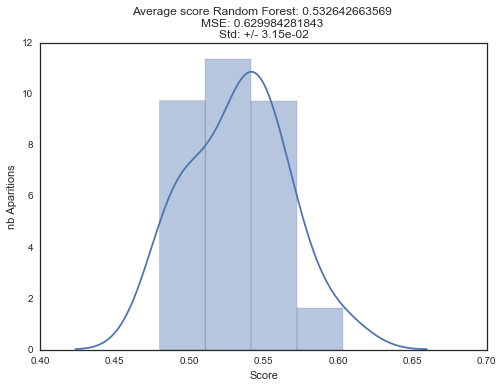

In [75]:
from sklearn.cross_validation import cross_val_score

#Al igual que abans, hauria de retornar una distribució normal (utilitzo X i y directament!)
rf_scores = cross_val_score(rf, X, y, cv=20,n_jobs=4)
rf_mses = cross_val_score(rf, X, y, cv=20, scoring='mean_squared_error',n_jobs=4)

plt.title('Average score Random Forest: {} \nMSE: {} \nStd: +/- {:.2e}'.format(
        np.mean(rf_scores), -np.mean(rf_mses), np.std(rf_scores)))
plt.ylabel('nb Aparitions')
plt.xlabel('Score')

sb.distplot(rf_scores)

In [67]:
rf.get_params().keys()

['warm_start',
 'oob_score',
 'n_jobs',
 'verbose',
 'max_leaf_nodes',
 'bootstrap',
 'min_samples_leaf',
 'n_estimators',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'criterion',
 'random_state',
 'max_features',
 'max_depth',
 'class_weight']

In [71]:
from sklearn.grid_search import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
                                    
cross_validation = StratifiedKFold(y, n_folds=15)

param_dist = {"max_depth": range(1,10),
              "n_estimators":range(10,1000,100),
              "max_features": list(range(1,77)),
              "min_samples_split": sp_randint(1, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

n_iter_search = 20
grid_search = RandomizedSearchCV(rf, param_dist, n_iter=n_iter_search, cv=cross_validation, n_jobs=4, verbose=10)

grid_search.fit(X, y)
print('Best score Random Forest: {}'.format(grid_search.best_score_))
print('Best parameters Random Forest: {}'.format(grid_search.best_params_))

Fitting 15 folds for each of 20 candidates, totalling 300 fits
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=10, max_features=48, criterion=gini, min_samples_split=8, max_depth=8 
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=10, max_features=48, criterion=gini, min_samples_split=8, max_depth=8 
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=10, max_features=48, criterion=gini, min_samples_split=8, max_depth=8 
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=10, max_features=48, criterion=gini, min_samples_split=8, max_depth=8 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8

[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=10, max_features=48, criterion=gini, min_samples_split=8, max_depth=8, score=0.556213 -   0.6s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=10, max_features=48, criterion=gini, min_samples_split=8, max_depth=8 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=10, max_features=48, criterion=gini, min_samples_split=8, max_depth=8, score=0.538462 -   0.6s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=10, max_features=48, criterion=gini, min_samples_split=8, max_depth=8 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=10, max_features=48, criterion=gini, min_samples_split=8, max_depth=8, score=0.473373 -   0.6s
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=10, max_features=48, criterion=gini, min_samples_split=8, max_depth=8, score=0.514793 -   0.6s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=10, max_features=48, criterion=gini, min_samples_split=8, max_depth=8 
[CV] bootstrap=Fal

/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8

[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=10, max_features=48, criterion=gini, min_samples_split=8, max_depth=8, score=0.571429 -   0.5s
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=10, max_features=48, criterion=gini, min_samples_split=8, max_depth=8, score=0.517857 -   0.5s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=10, max_features=48, criterion=gini, min_samples_split=8, max_depth=8 
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=10, max_features=48, criterion=gini, min_samples_split=8, max_depth=8 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=10, max_features=48, criterion=gini, min_samples_split=8, max_depth=8, score=0.482143 -   0.6s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=10, max_features=48, criterion=gini, min_samples_split=8, max_depth=8 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=10, max_features=48, criterion=gini, min_samples_split=8, max_depth=8, score=0.511905 -   0.6s
[CV] bootstrap=Fal

[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    1.1s
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.v

[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=10, max_features=48, criterion=gini, min_samples_split=8, max_depth=8, score=0.500000 -   0.4s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=10, max_features=48, criterion=gini, min_samples_split=8, max_depth=8 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=10, max_features=48, criterion=gini, min_samples_split=8, max_depth=8, score=0.560241 -   0.5s
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=10, max_features=48, criterion=gini, min_samples_split=8, max_depth=8, score=0.475904 -   0.5s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=10, max_features=48, criterion=gini, min_samples_split=8, max_depth=8 
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=10, max_features=48, criterion=gini, min_samples_split=8, max_depth=8 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=10, max_features=48, criterion=gini, min_samples_split=8, max_depth=8, score=0.493976 -   0.5s
[CV] bootstrap=Fal

/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    1.6s
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.v

[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=10, max_features=48, criterion=gini, min_samples_split=8, max_depth=8, score=0.463855 -   0.4s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=610, max_features=37, criterion=entropy, min_samples_split=6, max_depth=5 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=10, max_features=48, criterion=gini, min_samples_split=8, max_depth=8, score=0.469880 -   0.4s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=610, max_features=37, criterion=entropy, min_samples_split=6, max_depth=5 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=10, max_features=48, criterion=gini, min_samples_split=8, max_depth=8, score=0.493976 -   0.4s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=610, max_features=37, criterion=entropy, min_samples_split=6, max_depth=5 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8

[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=610, max_features=37, criterion=entropy, min_samples_split=6, max_depth=5, score=0.538462 -  29.2s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=610, max_features=37, criterion=entropy, min_samples_split=6, max_depth=5 
[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=610, max_features=37, criterion=entropy, min_samples_split=6, max_depth=5, score=0.520710 -  29.5s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=610, max_features=37, criterion=entropy, min_samples_split=6, max_depth=5 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   31.2s
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=610, max_features=37, criterion=entropy, min_samples_split=6, max_depth=5, score=0.514793 -  31.0s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=610, max_features=37, criterion=entropy, min_samples_split=6, max_depth=5 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=610, max_features=37, criterion=entropy, min_samples_split=6, max_depth=5, score=0.526627 -  31.6s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=610, max_features=37, criterion=entropy, min_samples_split=6, max_depth=5 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=610, max_features=37, criterion=entropy, min_samples_split=6, max_depth=5, score=0.529762 -  30.2s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=610, max_features=37, criterion=entropy, min_samples_split=6, max_depth=5 
[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=610, max_features=37, criterion=entropy, min_samples_split=6, max_depth=5, score=0.494048 -  30.3s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=610, max_features=37, criterion=entropy, min_samples_split=6, max_depth=5 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=610, max_features=37, criterion=entropy, min_samples_split=6, max_depth=5, score=0.559524 -  29.2s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=610, max_features=37, criterion=entropy, min_samples_split=6, max_depth=5 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=610, max_features=37, criterion=entropy, min_samples_split=6, max_depth=5, score=0.541667 -  29.4s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=610, max_features=37, criterion=entropy, min_samples_split=6, max_depth=5 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=610, max_features=37, criterion=entropy, min_samples_split=6, max_depth=5, score=0.578313 -  28.6s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=610, max_features=37, criterion=entropy, min_samples_split=6, max_depth=5 


[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  1.5min
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=610, max_features=37, criterion=entropy, min_samples_split=6, max_depth=5, score=0.506024 -  29.1s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=610, max_features=37, criterion=entropy, min_samples_split=6, max_depth=5 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=610, max_features=37, criterion=entropy, min_samples_split=6, max_depth=5, score=0.530120 -  29.4s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=610, max_features=37, criterion=entropy, min_samples_split=6, max_depth=5 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=610, max_features=37, criterion=entropy, min_samples_split=6, max_depth=5, score=0.500000 -  29.6s
[CV] bootstrap=True, min_samples_leaf=9, n_estimators=310, max_features=17, criterion=gini, min_samples_split=4, max_depth=6 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=9, n_estimators=310, max_features=17, criterion=gini, min_samples_split=4, max_depth=6, score=0.538462 -   2.9s
[CV] bootstrap=True, min_samples_leaf=9, n_estimators=310, max_features=17, criterion=gini, min_samples_split=4, max_depth=6 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=9, n_estimators=310, max_features=17, criterion=gini, min_samples_split=4, max_depth=6, score=0.550296 -   2.5s
[CV] bootstrap=True, min_samples_leaf=9, n_estimators=310, max_features=17, criterion=gini, min_samples_split=4, max_depth=6 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=9, n_estimators=310, max_features=17, criterion=gini, min_samples_split=4, max_depth=6, score=0.485207 -   2.5s
[CV] bootstrap=True, min_samples_leaf=9, n_estimators=310, max_features=17, criterion=gini, min_samples_split=4, max_depth=6 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=9, n_estimators=310, max_features=17, criterion=gini, min_samples_split=4, max_depth=6, score=0.520710 -   2.5s
[CV] bootstrap=True, min_samples_leaf=9, n_estimators=310, max_features=17, criterion=gini, min_samples_split=4, max_depth=6 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=9, n_estimators=310, max_features=17, criterion=gini, min_samples_split=4, max_depth=6, score=0.505952 -   2.5s
[CV] bootstrap=True, min_samples_leaf=9, n_estimators=310, max_features=17, criterion=gini, min_samples_split=4, max_depth=6 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=9, n_estimators=310, max_features=17, criterion=gini, min_samples_split=4, max_depth=6, score=0.577381 -   2.5s
[CV] bootstrap=True, min_samples_leaf=9, n_estimators=310, max_features=17, criterion=gini, min_samples_split=4, max_depth=6 


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  1.8min
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=9, n_estimators=310, max_features=17, criterion=gini, min_samples_split=4, max_depth=6, score=0.553571 -   2.5s
[CV] bootstrap=True, min_samples_leaf=9, n_estimators=310, max_features=17, criterion=gini, min_samples_split=4, max_depth=6 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=9, n_estimators=310, max_features=17, criterion=gini, min_samples_split=4, max_depth=6, score=0.529762 -   2.7s
[CV] bootstrap=True, min_samples_leaf=9, n_estimators=310, max_features=17, criterion=gini, min_samples_split=4, max_depth=6 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=9, n_estimators=310, max_features=17, criterion=gini, min_samples_split=4, max_depth=6, score=0.608434 -   2.5s
[CV] bootstrap=True, min_samples_leaf=9, n_estimators=310, max_features=17, criterion=gini, min_samples_split=4, max_depth=6 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=9, n_estimators=310, max_features=17, criterion=gini, min_samples_split=4, max_depth=6, score=0.506024 -   2.5s
[CV] bootstrap=True, min_samples_leaf=9, n_estimators=310, max_features=17, criterion=gini, min_samples_split=4, max_depth=6 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=610, max_features=37, criterion=entropy, min_samples_split=6, max_depth=5, score=0.512048 -  29.0s
[CV] bootstrap=True, min_samples_leaf=9, n_estimators=310, max_features=17, criterion=gini, min_samples_split=4, max_depth=6 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=610, max_features=37, criterion=entropy, min_samples_split=6, max_depth=5, score=0.493976 -  29.2s
[CV] bootstrap=True, min_samples_leaf=9, n_estimators=310, max_features=17, criterion=gini, min_samples_split=4, max_depth=6 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=610, max_features=37, criterion=entropy, min_samples_split=6, max_depth=5, score=0.566265 -  28.6s
[CV] bootstrap=True, min_samples_leaf=9, n_estimators=310, max_features=17, criterion=gini, min_samples_split=4, max_depth=6 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=9, n_estimators=310, max_features=17, criterion=gini, min_samples_split=4, max_depth=6, score=0.524096 -   2.5s
[CV] bootstrap=True, min_samples_leaf=9, n_estimators=310, max_features=17, criterion=gini, min_samples_split=4, max_depth=6 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=9, n_estimators=310, max_features=17, criterion=gini, min_samples_split=4, max_depth=6, score=0.506024 -   2.6s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=210, max_features=69, criterion=entropy, min_samples_split=1, max_depth=4 


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  2.0min
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=9, n_estimators=310, max_features=17, criterion=gini, min_samples_split=4, max_depth=6, score=0.512048 -   2.6s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=210, max_features=69, criterion=entropy, min_samples_split=1, max_depth=4 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=9, n_estimators=310, max_features=17, criterion=gini, min_samples_split=4, max_depth=6, score=0.518072 -   2.6s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=210, max_features=69, criterion=entropy, min_samples_split=1, max_depth=4 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=9, n_estimators=310, max_features=17, criterion=gini, min_samples_split=4, max_depth=6, score=0.566265 -   2.6s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=210, max_features=69, criterion=entropy, min_samples_split=1, max_depth=4 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=210, max_features=69, criterion=entropy, min_samples_split=1, max_depth=4, score=0.544379 -  14.8s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=210, max_features=69, criterion=entropy, min_samples_split=1, max_depth=4 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=210, max_features=69, criterion=entropy, min_samples_split=1, max_depth=4, score=0.544379 -  14.8s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=210, max_features=69, criterion=entropy, min_samples_split=1, max_depth=4 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=210, max_features=69, criterion=entropy, min_samples_split=1, max_depth=4, score=0.473373 -  15.3s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=210, max_features=69, criterion=entropy, min_samples_split=1, max_depth=4 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=210, max_features=69, criterion=entropy, min_samples_split=1, max_depth=4, score=0.544379 -  15.7s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=210, max_features=69, criterion=entropy, min_samples_split=1, max_depth=4 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=210, max_features=69, criterion=entropy, min_samples_split=1, max_depth=4, score=0.541667 -  15.4s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=210, max_features=69, criterion=entropy, min_samples_split=1, max_depth=4 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=210, max_features=69, criterion=entropy, min_samples_split=1, max_depth=4, score=0.505952 -  16.3s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=210, max_features=69, criterion=entropy, min_samples_split=1, max_depth=4 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=210, max_features=69, criterion=entropy, min_samples_split=1, max_depth=4, score=0.583333 -  15.1s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=210, max_features=69, criterion=entropy, min_samples_split=1, max_depth=4 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=210, max_features=69, criterion=entropy, min_samples_split=1, max_depth=4, score=0.547619 -  16.1s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=210, max_features=69, criterion=entropy, min_samples_split=1, max_depth=4 


[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:  2.6min
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=210, max_features=69, criterion=entropy, min_samples_split=1, max_depth=4, score=0.548193 -  15.4s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=210, max_features=69, criterion=entropy, min_samples_split=1, max_depth=4 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=210, max_features=69, criterion=entropy, min_samples_split=1, max_depth=4, score=0.481928 -  15.6s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=210, max_features=69, criterion=entropy, min_samples_split=1, max_depth=4 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=210, max_features=69, criterion=entropy, min_samples_split=1, max_depth=4, score=0.493976 -  15.2s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=210, max_features=69, criterion=entropy, min_samples_split=1, max_depth=4 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=210, max_features=69, criterion=entropy, min_samples_split=1, max_depth=4, score=0.500000 -  15.1s
[CV] bootstrap=True, min_samples_leaf=9, n_estimators=710, max_features=12, criterion=gini, min_samples_split=1, max_depth=5 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=9, n_estimators=710, max_features=12, criterion=gini, min_samples_split=1, max_depth=5, score=0.514793 -   3.8s
[CV] bootstrap=True, min_samples_leaf=9, n_estimators=710, max_features=12, criterion=gini, min_samples_split=1, max_depth=5 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=9, n_estimators=710, max_features=12, criterion=gini, min_samples_split=1, max_depth=5, score=0.520710 -   3.8s
[CV] bootstrap=True, min_samples_leaf=9, n_estimators=710, max_features=12, criterion=gini, min_samples_split=1, max_depth=5 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=9, n_estimators=710, max_features=12, criterion=gini, min_samples_split=1, max_depth=5, score=0.485207 -   4.3s
[CV] bootstrap=True, min_samples_leaf=9, n_estimators=710, max_features=12, criterion=gini, min_samples_split=1, max_depth=5 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=210, max_features=69, criterion=entropy, min_samples_split=1, max_depth=4, score=0.506024 -  15.9s
[CV] bootstrap=True, min_samples_leaf=9, n_estimators=710, max_features=12, criterion=gini, min_samples_split=1, max_depth=5 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=210, max_features=69, criterion=entropy, min_samples_split=1, max_depth=4, score=0.548193 -  15.7s
[CV] bootstrap=True, min_samples_leaf=9, n_estimators=710, max_features=12, criterion=gini, min_samples_split=1, max_depth=5 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=210, max_features=69, criterion=entropy, min_samples_split=1, max_depth=4, score=0.500000 -  15.8s
[CV] bootstrap=True, min_samples_leaf=9, n_estimators=710, max_features=12, criterion=gini, min_samples_split=1, max_depth=5 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8

[CV]  bootstrap=True, min_samples_leaf=9, n_estimators=710, max_features=12, criterion=gini, min_samples_split=1, max_depth=5, score=0.508876 -   4.6s
[CV] bootstrap=True, min_samples_leaf=9, n_estimators=710, max_features=12, criterion=gini, min_samples_split=1, max_depth=5 


[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  3.1min
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=9, n_estimators=710, max_features=12, criterion=gini, min_samples_split=1, max_depth=5, score=0.553571 -   4.5s
[CV] bootstrap=True, min_samples_leaf=9, n_estimators=710, max_features=12, criterion=gini, min_samples_split=1, max_depth=5 
[CV]  bootstrap=True, min_samples_leaf=9, n_estimators=710, max_features=12, criterion=gini, min_samples_split=1, max_depth=5, score=0.505952 -   4.7s
[CV] bootstrap=True, min_samples_leaf=9, n_estimators=710, max_features=12, criterion=gini, min_samples_split=1, max_depth=5 
[CV]  bootstrap=True, min_samples_leaf=9, n_estimators=710, max_features=12, criterion=gini, min_samples_split=1, max_depth=5, score=0.559524 -   4.7s
[CV] bootstrap=True, min_samples_leaf=9, n_estimators=710, max_features=12, criterion=gini, min_samples_split=1, max_depth=5 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8

[CV]  bootstrap=True, min_samples_leaf=9, n_estimators=710, max_features=12, criterion=gini, min_samples_split=1, max_depth=5, score=0.547619 -   4.3s
[CV] bootstrap=True, min_samples_leaf=9, n_estimators=710, max_features=12, criterion=gini, min_samples_split=1, max_depth=5 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=9, n_estimators=710, max_features=12, criterion=gini, min_samples_split=1, max_depth=5, score=0.530120 -   4.0s
[CV] bootstrap=True, min_samples_leaf=9, n_estimators=710, max_features=12, criterion=gini, min_samples_split=1, max_depth=5 
[CV]  bootstrap=True, min_samples_leaf=9, n_estimators=710, max_features=12, criterion=gini, min_samples_split=1, max_depth=5, score=0.493976 -   4.2s
[CV] bootstrap=True, min_samples_leaf=9, n_estimators=710, max_features=12, criterion=gini, min_samples_split=1, max_depth=5 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=9, n_estimators=710, max_features=12, criterion=gini, min_samples_split=1, max_depth=5, score=0.620482 -   4.5s
[CV] bootstrap=True, min_samples_leaf=9, n_estimators=710, max_features=12, criterion=gini, min_samples_split=1, max_depth=5 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=9, n_estimators=710, max_features=12, criterion=gini, min_samples_split=1, max_depth=5, score=0.493976 -   4.5s
[CV] bootstrap=True, min_samples_leaf=6, n_estimators=410, max_features=27, criterion=gini, min_samples_split=5, max_depth=3 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=9, n_estimators=710, max_features=12, criterion=gini, min_samples_split=1, max_depth=5, score=0.512048 -   4.3s
[CV] bootstrap=True, min_samples_leaf=6, n_estimators=410, max_features=27, criterion=gini, min_samples_split=5, max_depth=3 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=9, n_estimators=710, max_features=12, criterion=gini, min_samples_split=1, max_depth=5, score=0.506024 -   4.6s
[CV] bootstrap=True, min_samples_leaf=6, n_estimators=410, max_features=27, criterion=gini, min_samples_split=5, max_depth=3 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=9, n_estimators=710, max_features=12, criterion=gini, min_samples_split=1, max_depth=5, score=0.554217 -   4.8s
[CV] bootstrap=True, min_samples_leaf=6, n_estimators=410, max_features=27, criterion=gini, min_samples_split=5, max_depth=3 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=6, n_estimators=410, max_features=27, criterion=gini, min_samples_split=5, max_depth=3, score=0.514793 -   3.3s
[CV] bootstrap=True, min_samples_leaf=6, n_estimators=410, max_features=27, criterion=gini, min_samples_split=5, max_depth=3 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=6, n_estimators=410, max_features=27, criterion=gini, min_samples_split=5, max_depth=3, score=0.532544 -   3.1s
[CV] bootstrap=True, min_samples_leaf=6, n_estimators=410, max_features=27, criterion=gini, min_samples_split=5, max_depth=3 


[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:  3.3min
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=6, n_estimators=410, max_features=27, criterion=gini, min_samples_split=5, max_depth=3, score=0.485207 -   3.3s
[CV] bootstrap=True, min_samples_leaf=6, n_estimators=410, max_features=27, criterion=gini, min_samples_split=5, max_depth=3 
[CV]  bootstrap=True, min_samples_leaf=6, n_estimators=410, max_features=27, criterion=gini, min_samples_split=5, max_depth=3, score=0.520710 -   3.0s
[CV] bootstrap=True, min_samples_leaf=6, n_estimators=410, max_features=27, criterion=gini, min_samples_split=5, max_depth=3 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=6, n_estimators=410, max_features=27, criterion=gini, min_samples_split=5, max_depth=3, score=0.511905 -   3.1s
[CV] bootstrap=True, min_samples_leaf=6, n_estimators=410, max_features=27, criterion=gini, min_samples_split=5, max_depth=3 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=6, n_estimators=410, max_features=27, criterion=gini, min_samples_split=5, max_depth=3, score=0.553571 -   3.2s
[CV] bootstrap=True, min_samples_leaf=6, n_estimators=410, max_features=27, criterion=gini, min_samples_split=5, max_depth=3 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=6, n_estimators=410, max_features=27, criterion=gini, min_samples_split=5, max_depth=3, score=0.571429 -   3.0s
[CV] bootstrap=True, min_samples_leaf=6, n_estimators=410, max_features=27, criterion=gini, min_samples_split=5, max_depth=3 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=6, n_estimators=410, max_features=27, criterion=gini, min_samples_split=5, max_depth=3, score=0.517857 -   3.1s
[CV] bootstrap=True, min_samples_leaf=6, n_estimators=410, max_features=27, criterion=gini, min_samples_split=5, max_depth=3 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=6, n_estimators=410, max_features=27, criterion=gini, min_samples_split=5, max_depth=3, score=0.584337 -   3.6s
[CV] bootstrap=True, min_samples_leaf=6, n_estimators=410, max_features=27, criterion=gini, min_samples_split=5, max_depth=3 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=6, n_estimators=410, max_features=27, criterion=gini, min_samples_split=5, max_depth=3, score=0.518072 -   3.4s
[CV] bootstrap=True, min_samples_leaf=6, n_estimators=410, max_features=27, criterion=gini, min_samples_split=5, max_depth=3 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=6, n_estimators=410, max_features=27, criterion=gini, min_samples_split=5, max_depth=3, score=0.536145 -   3.4s
[CV] bootstrap=True, min_samples_leaf=6, n_estimators=410, max_features=27, criterion=gini, min_samples_split=5, max_depth=3 
[CV]  bootstrap=True, min_samples_leaf=6, n_estimators=410, max_features=27, criterion=gini, min_samples_split=5, max_depth=3, score=0.493976 -   3.3s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=110, max_features=56, criterion=gini, min_samples_split=4, max_depth=4 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=6, n_estimators=410, max_features=27, criterion=gini, min_samples_split=5, max_depth=3, score=0.512048 -   3.3s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=110, max_features=56, criterion=gini, min_samples_split=4, max_depth=4 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=6, n_estimators=410, max_features=27, criterion=gini, min_samples_split=5, max_depth=3, score=0.518072 -   3.2s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=110, max_features=56, criterion=gini, min_samples_split=4, max_depth=4 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=6, n_estimators=410, max_features=27, criterion=gini, min_samples_split=5, max_depth=3, score=0.560241 -   3.1s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=110, max_features=56, criterion=gini, min_samples_split=4, max_depth=4 


[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:  3.5min
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=110, max_features=56, criterion=gini, min_samples_split=4, max_depth=4, score=0.520710 -   3.2s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=110, max_features=56, criterion=gini, min_samples_split=4, max_depth=4 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=110, max_features=56, criterion=gini, min_samples_split=4, max_depth=4, score=0.538462 -   3.4s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=110, max_features=56, criterion=gini, min_samples_split=4, max_depth=4 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=110, max_features=56, criterion=gini, min_samples_split=4, max_depth=4, score=0.485207 -   3.0s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=110, max_features=56, criterion=gini, min_samples_split=4, max_depth=4 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=110, max_features=56, criterion=gini, min_samples_split=4, max_depth=4, score=0.538462 -   3.1s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=110, max_features=56, criterion=gini, min_samples_split=4, max_depth=4 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=110, max_features=56, criterion=gini, min_samples_split=4, max_depth=4, score=0.505952 -   3.3s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=110, max_features=56, criterion=gini, min_samples_split=4, max_depth=4 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=110, max_features=56, criterion=gini, min_samples_split=4, max_depth=4, score=0.541667 -   3.1s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=110, max_features=56, criterion=gini, min_samples_split=4, max_depth=4 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=110, max_features=56, criterion=gini, min_samples_split=4, max_depth=4, score=0.571429 -   3.0s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=110, max_features=56, criterion=gini, min_samples_split=4, max_depth=4 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=110, max_features=56, criterion=gini, min_samples_split=4, max_depth=4, score=0.547619 -   2.9s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=110, max_features=56, criterion=gini, min_samples_split=4, max_depth=4 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=110, max_features=56, criterion=gini, min_samples_split=4, max_depth=4, score=0.554217 -   3.0s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=110, max_features=56, criterion=gini, min_samples_split=4, max_depth=4 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=110, max_features=56, criterion=gini, min_samples_split=4, max_depth=4, score=0.487952 -   3.8s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=110, max_features=56, criterion=gini, min_samples_split=4, max_depth=4 
[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=110, max_features=56, criterion=gini, min_samples_split=4, max_depth=4, score=0.536145 -   3.1s
[CV] bootstrap=False, min_samples_leaf=10, n_estimators=110, max_features=56, criterion=gini, min_samples_split=4, max_depth=4 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=110, max_features=56, criterion=gini, min_samples_split=4, max_depth=4, score=0.493976 -   3.3s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=710, max_features=76, criterion=gini, min_samples_split=10, max_depth=8 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=110, max_features=56, criterion=gini, min_samples_split=4, max_depth=4, score=0.512048 -   3.6s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=710, max_features=76, criterion=gini, min_samples_split=10, max_depth=8 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=110, max_features=56, criterion=gini, min_samples_split=4, max_depth=4, score=0.554217 -   3.3s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=710, max_features=76, criterion=gini, min_samples_split=10, max_depth=8 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=10, n_estimators=110, max_features=56, criterion=gini, min_samples_split=4, max_depth=4, score=0.493976 -   3.7s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=710, max_features=76, criterion=gini, min_samples_split=10, max_depth=8 


[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:  3.7min
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=710, max_features=76, criterion=gini, min_samples_split=10, max_depth=8, score=0.538462 -  29.0s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=710, max_features=76, criterion=gini, min_samples_split=10, max_depth=8 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=710, max_features=76, criterion=gini, min_samples_split=10, max_depth=8, score=0.532544 -  28.4s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=710, max_features=76, criterion=gini, min_samples_split=10, max_depth=8 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=710, max_features=76, criterion=gini, min_samples_split=10, max_depth=8, score=0.491124 -  29.1s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=710, max_features=76, criterion=gini, min_samples_split=10, max_depth=8 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=710, max_features=76, criterion=gini, min_samples_split=10, max_depth=8, score=0.550296 -  29.3s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=710, max_features=76, criterion=gini, min_samples_split=10, max_depth=8 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=710, max_features=76, criterion=gini, min_samples_split=10, max_depth=8, score=0.488095 -  28.6s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=710, max_features=76, criterion=gini, min_samples_split=10, max_depth=8 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=710, max_features=76, criterion=gini, min_samples_split=10, max_depth=8, score=0.565476 -  28.9s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=710, max_features=76, criterion=gini, min_samples_split=10, max_depth=8 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=710, max_features=76, criterion=gini, min_samples_split=10, max_depth=8, score=0.535714 -  28.1s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=710, max_features=76, criterion=gini, min_samples_split=10, max_depth=8 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=710, max_features=76, criterion=gini, min_samples_split=10, max_depth=8, score=0.547619 -  29.0s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=710, max_features=76, criterion=gini, min_samples_split=10, max_depth=8 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=710, max_features=76, criterion=gini, min_samples_split=10, max_depth=8, score=0.566265 -  29.2s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=710, max_features=76, criterion=gini, min_samples_split=10, max_depth=8 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=710, max_features=76, criterion=gini, min_samples_split=10, max_depth=8, score=0.481928 -  30.0s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=710, max_features=76, criterion=gini, min_samples_split=10, max_depth=8 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=710, max_features=76, criterion=gini, min_samples_split=10, max_depth=8, score=0.518072 -  29.5s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=710, max_features=76, criterion=gini, min_samples_split=10, max_depth=8 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=710, max_features=76, criterion=gini, min_samples_split=10, max_depth=8, score=0.487952 -  29.8s
[CV] bootstrap=True, min_samples_leaf=9, n_estimators=710, max_features=60, criterion=entropy, min_samples_split=1, max_depth=6 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=710, max_features=76, criterion=gini, min_samples_split=10, max_depth=8, score=0.487952 -  33.7s
[CV] bootstrap=True, min_samples_leaf=9, n_estimators=710, max_features=60, criterion=entropy, min_samples_split=1, max_depth=6 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=710, max_features=76, criterion=gini, min_samples_split=10, max_depth=8, score=0.518072 -  33.7s
[CV] bootstrap=True, min_samples_leaf=9, n_estimators=710, max_features=60, criterion=entropy, min_samples_split=1, max_depth=6 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=710, max_features=76, criterion=gini, min_samples_split=10, max_depth=8, score=0.554217 -  34.3s
[CV] bootstrap=True, min_samples_leaf=9, n_estimators=710, max_features=60, criterion=entropy, min_samples_split=1, max_depth=6 


[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  5.7min
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=9, n_estimators=710, max_features=60, criterion=entropy, min_samples_split=1, max_depth=6, score=0.514793 -  46.7s
[CV] bootstrap=True, min_samples_leaf=9, n_estimators=710, max_features=60, criterion=entropy, min_samples_split=1, max_depth=6 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=9, n_estimators=710, max_features=60, criterion=entropy, min_samples_split=1, max_depth=6, score=0.526627 -  46.5s
[CV] bootstrap=True, min_samples_leaf=9, n_estimators=710, max_features=60, criterion=entropy, min_samples_split=1, max_depth=6 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=9, n_estimators=710, max_features=60, criterion=entropy, min_samples_split=1, max_depth=6, score=0.497041 -  49.5s
[CV] bootstrap=True, min_samples_leaf=9, n_estimators=710, max_features=60, criterion=entropy, min_samples_split=1, max_depth=6 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=9, n_estimators=710, max_features=60, criterion=entropy, min_samples_split=1, max_depth=6, score=0.526627 -  48.6s
[CV] bootstrap=True, min_samples_leaf=9, n_estimators=710, max_features=60, criterion=entropy, min_samples_split=1, max_depth=6 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=9, n_estimators=710, max_features=60, criterion=entropy, min_samples_split=1, max_depth=6, score=0.505952 -  46.8s
[CV] bootstrap=True, min_samples_leaf=9, n_estimators=710, max_features=60, criterion=entropy, min_samples_split=1, max_depth=6 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=9, n_estimators=710, max_features=60, criterion=entropy, min_samples_split=1, max_depth=6, score=0.565476 -  42.8s
[CV] bootstrap=True, min_samples_leaf=9, n_estimators=710, max_features=60, criterion=entropy, min_samples_split=1, max_depth=6 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=9, n_estimators=710, max_features=60, criterion=entropy, min_samples_split=1, max_depth=6, score=0.571429 -  40.8s
[CV] bootstrap=True, min_samples_leaf=9, n_estimators=710, max_features=60, criterion=entropy, min_samples_split=1, max_depth=6 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=9, n_estimators=710, max_features=60, criterion=entropy, min_samples_split=1, max_depth=6, score=0.547619 -  40.2s
[CV] bootstrap=True, min_samples_leaf=9, n_estimators=710, max_features=60, criterion=entropy, min_samples_split=1, max_depth=6 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=9, n_estimators=710, max_features=60, criterion=entropy, min_samples_split=1, max_depth=6, score=0.572289 -  40.3s
[CV] bootstrap=True, min_samples_leaf=9, n_estimators=710, max_features=60, criterion=entropy, min_samples_split=1, max_depth=6 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=9, n_estimators=710, max_features=60, criterion=entropy, min_samples_split=1, max_depth=6, score=0.512048 -  40.4s
[CV] bootstrap=True, min_samples_leaf=9, n_estimators=710, max_features=60, criterion=entropy, min_samples_split=1, max_depth=6 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=9, n_estimators=710, max_features=60, criterion=entropy, min_samples_split=1, max_depth=6, score=0.524096 -  39.9s
[CV] bootstrap=True, min_samples_leaf=9, n_estimators=710, max_features=60, criterion=entropy, min_samples_split=1, max_depth=6 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=9, n_estimators=710, max_features=60, criterion=entropy, min_samples_split=1, max_depth=6, score=0.500000 -  39.8s
[CV] bootstrap=False, min_samples_leaf=8, n_estimators=10, max_features=50, criterion=gini, min_samples_split=9, max_depth=9 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=8, n_estimators=10, max_features=50, criterion=gini, min_samples_split=9, max_depth=9, score=0.520710 -   0.6s
[CV] bootstrap=False, min_samples_leaf=8, n_estimators=10, max_features=50, criterion=gini, min_samples_split=9, max_depth=9 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=8, n_estimators=10, max_features=50, criterion=gini, min_samples_split=9, max_depth=9, score=0.550296 -   0.5s
[CV] bootstrap=False, min_samples_leaf=8, n_estimators=10, max_features=50, criterion=gini, min_samples_split=9, max_depth=9 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=8, n_estimators=10, max_features=50, criterion=gini, min_samples_split=9, max_depth=9, score=0.473373 -   0.4s
[CV] bootstrap=False, min_samples_leaf=8, n_estimators=10, max_features=50, criterion=gini, min_samples_split=9, max_depth=9 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=8, n_estimators=10, max_features=50, criterion=gini, min_samples_split=9, max_depth=9, score=0.532544 -   0.5s
[CV] bootstrap=False, min_samples_leaf=8, n_estimators=10, max_features=50, criterion=gini, min_samples_split=9, max_depth=9 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=8, n_estimators=10, max_features=50, criterion=gini, min_samples_split=9, max_depth=9, score=0.476190 -   0.5s
[CV] bootstrap=False, min_samples_leaf=8, n_estimators=10, max_features=50, criterion=gini, min_samples_split=9, max_depth=9 


[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:  7.9min
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=8, n_estimators=10, max_features=50, criterion=gini, min_samples_split=9, max_depth=9, score=0.517857 -   0.5s
[CV] bootstrap=False, min_samples_leaf=8, n_estimators=10, max_features=50, criterion=gini, min_samples_split=9, max_depth=9 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=8, n_estimators=10, max_features=50, criterion=gini, min_samples_split=9, max_depth=9, score=0.517857 -   0.5s
[CV] bootstrap=False, min_samples_leaf=8, n_estimators=10, max_features=50, criterion=gini, min_samples_split=9, max_depth=9 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=8, n_estimators=10, max_features=50, criterion=gini, min_samples_split=9, max_depth=9, score=0.529762 -   0.5s
[CV] bootstrap=False, min_samples_leaf=8, n_estimators=10, max_features=50, criterion=gini, min_samples_split=9, max_depth=9 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=8, n_estimators=10, max_features=50, criterion=gini, min_samples_split=9, max_depth=9, score=0.518072 -   0.4s
[CV] bootstrap=False, min_samples_leaf=8, n_estimators=10, max_features=50, criterion=gini, min_samples_split=9, max_depth=9 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=8, n_estimators=10, max_features=50, criterion=gini, min_samples_split=9, max_depth=9, score=0.475904 -   0.5s
[CV] bootstrap=False, min_samples_leaf=8, n_estimators=10, max_features=50, criterion=gini, min_samples_split=9, max_depth=9 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=8, n_estimators=10, max_features=50, criterion=gini, min_samples_split=9, max_depth=9, score=0.481928 -   0.5s
[CV] bootstrap=False, min_samples_leaf=8, n_estimators=10, max_features=50, criterion=gini, min_samples_split=9, max_depth=9 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=8, n_estimators=10, max_features=50, criterion=gini, min_samples_split=9, max_depth=9, score=0.475904 -   0.4s
[CV] bootstrap=False, min_samples_leaf=8, n_estimators=10, max_features=50, criterion=gini, min_samples_split=9, max_depth=9 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=8, n_estimators=10, max_features=50, criterion=gini, min_samples_split=9, max_depth=9, score=0.481928 -   0.5s
[CV] bootstrap=False, min_samples_leaf=8, n_estimators=10, max_features=50, criterion=gini, min_samples_split=9, max_depth=9 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=8, n_estimators=10, max_features=50, criterion=gini, min_samples_split=9, max_depth=9, score=0.542169 -   0.4s
[CV] bootstrap=False, min_samples_leaf=8, n_estimators=10, max_features=50, criterion=gini, min_samples_split=9, max_depth=9 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=8, n_estimators=10, max_features=50, criterion=gini, min_samples_split=9, max_depth=9, score=0.542169 -   0.4s
[CV] bootstrap=True, min_samples_leaf=10, n_estimators=710, max_features=72, criterion=entropy, min_samples_split=2, max_depth=7 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=9, n_estimators=710, max_features=60, criterion=entropy, min_samples_split=1, max_depth=6, score=0.500000 -  40.0s
[CV] bootstrap=True, min_samples_leaf=10, n_estimators=710, max_features=72, criterion=entropy, min_samples_split=2, max_depth=7 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=9, n_estimators=710, max_features=60, criterion=entropy, min_samples_split=1, max_depth=6, score=0.512048 -  41.2s
[CV] bootstrap=True, min_samples_leaf=10, n_estimators=710, max_features=72, criterion=entropy, min_samples_split=2, max_depth=7 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=9, n_estimators=710, max_features=60, criterion=entropy, min_samples_split=1, max_depth=6, score=0.566265 -  42.3s
[CV] bootstrap=True, min_samples_leaf=10, n_estimators=710, max_features=72, criterion=entropy, min_samples_split=2, max_depth=7 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=10, n_estimators=710, max_features=72, criterion=entropy, min_samples_split=2, max_depth=7, score=0.526627 -  55.6s
[CV] bootstrap=True, min_samples_leaf=10, n_estimators=710, max_features=72, criterion=entropy, min_samples_split=2, max_depth=7 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=10, n_estimators=710, max_features=72, criterion=entropy, min_samples_split=2, max_depth=7, score=0.532544 -  55.1s
[CV] bootstrap=True, min_samples_leaf=10, n_estimators=710, max_features=72, criterion=entropy, min_samples_split=2, max_depth=7 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=10, n_estimators=710, max_features=72, criterion=entropy, min_samples_split=2, max_depth=7, score=0.497041 -  56.1s
[CV] bootstrap=True, min_samples_leaf=10, n_estimators=710, max_features=72, criterion=entropy, min_samples_split=2, max_depth=7 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=10, n_estimators=710, max_features=72, criterion=entropy, min_samples_split=2, max_depth=7, score=0.550296 -  55.4s
[CV] bootstrap=True, min_samples_leaf=10, n_estimators=710, max_features=72, criterion=entropy, min_samples_split=2, max_depth=7 


[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  9.5min
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=10, n_estimators=710, max_features=72, criterion=entropy, min_samples_split=2, max_depth=7, score=0.494048 -  55.1s
[CV] bootstrap=True, min_samples_leaf=10, n_estimators=710, max_features=72, criterion=entropy, min_samples_split=2, max_depth=7 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=10, n_estimators=710, max_features=72, criterion=entropy, min_samples_split=2, max_depth=7, score=0.559524 -  54.8s
[CV] bootstrap=True, min_samples_leaf=10, n_estimators=710, max_features=72, criterion=entropy, min_samples_split=2, max_depth=7 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=10, n_estimators=710, max_features=72, criterion=entropy, min_samples_split=2, max_depth=7, score=0.541667 -  51.6s
[CV] bootstrap=True, min_samples_leaf=10, n_estimators=710, max_features=72, criterion=entropy, min_samples_split=2, max_depth=7 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=10, n_estimators=710, max_features=72, criterion=entropy, min_samples_split=2, max_depth=7, score=0.559524 -  54.4s
[CV] bootstrap=True, min_samples_leaf=10, n_estimators=710, max_features=72, criterion=entropy, min_samples_split=2, max_depth=7 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=10, n_estimators=710, max_features=72, criterion=entropy, min_samples_split=2, max_depth=7, score=0.560241 -  52.1s
[CV] bootstrap=True, min_samples_leaf=10, n_estimators=710, max_features=72, criterion=entropy, min_samples_split=2, max_depth=7 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=10, n_estimators=710, max_features=72, criterion=entropy, min_samples_split=2, max_depth=7, score=0.500000 -  54.4s
[CV] bootstrap=True, min_samples_leaf=10, n_estimators=710, max_features=72, criterion=entropy, min_samples_split=2, max_depth=7 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=10, n_estimators=710, max_features=72, criterion=entropy, min_samples_split=2, max_depth=7, score=0.530120 -  53.2s
[CV] bootstrap=True, min_samples_leaf=10, n_estimators=710, max_features=72, criterion=entropy, min_samples_split=2, max_depth=7 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=10, n_estimators=710, max_features=72, criterion=entropy, min_samples_split=2, max_depth=7, score=0.487952 -  53.3s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=610, max_features=41, criterion=entropy, min_samples_split=3, max_depth=7 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=10, n_estimators=710, max_features=72, criterion=entropy, min_samples_split=2, max_depth=7, score=0.487952 -  52.1s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=610, max_features=41, criterion=entropy, min_samples_split=3, max_depth=7 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=10, n_estimators=710, max_features=72, criterion=entropy, min_samples_split=2, max_depth=7, score=0.512048 -  51.9s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=610, max_features=41, criterion=entropy, min_samples_split=3, max_depth=7 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=610, max_features=41, criterion=entropy, min_samples_split=3, max_depth=7, score=0.544379 -  43.6s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=610, max_features=41, criterion=entropy, min_samples_split=3, max_depth=7 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=10, n_estimators=710, max_features=72, criterion=entropy, min_samples_split=2, max_depth=7, score=0.560241 -  52.4s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=610, max_features=41, criterion=entropy, min_samples_split=3, max_depth=7 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=610, max_features=41, criterion=entropy, min_samples_split=3, max_depth=7, score=0.544379 -  44.5s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=610, max_features=41, criterion=entropy, min_samples_split=3, max_depth=7 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=610, max_features=41, criterion=entropy, min_samples_split=3, max_depth=7, score=0.491124 -  47.1s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=610, max_features=41, criterion=entropy, min_samples_split=3, max_depth=7 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=610, max_features=41, criterion=entropy, min_samples_split=3, max_depth=7, score=0.544379 -  47.0s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=610, max_features=41, criterion=entropy, min_samples_split=3, max_depth=7 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=610, max_features=41, criterion=entropy, min_samples_split=3, max_depth=7, score=0.505952 -  47.6s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=610, max_features=41, criterion=entropy, min_samples_split=3, max_depth=7 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=610, max_features=41, criterion=entropy, min_samples_split=3, max_depth=7, score=0.565476 -  47.3s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=610, max_features=41, criterion=entropy, min_samples_split=3, max_depth=7 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=610, max_features=41, criterion=entropy, min_samples_split=3, max_depth=7, score=0.559524 -  46.0s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=610, max_features=41, criterion=entropy, min_samples_split=3, max_depth=7 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=610, max_features=41, criterion=entropy, min_samples_split=3, max_depth=7, score=0.529762 -  43.3s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=610, max_features=41, criterion=entropy, min_samples_split=3, max_depth=7 


[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed: 13.5min
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=610, max_features=41, criterion=entropy, min_samples_split=3, max_depth=7, score=0.590361 -  43.3s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=610, max_features=41, criterion=entropy, min_samples_split=3, max_depth=7 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=610, max_features=41, criterion=entropy, min_samples_split=3, max_depth=7, score=0.481928 -  45.3s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=610, max_features=41, criterion=entropy, min_samples_split=3, max_depth=7 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=610, max_features=41, criterion=entropy, min_samples_split=3, max_depth=7, score=0.512048 -  44.5s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=610, max_features=41, criterion=entropy, min_samples_split=3, max_depth=7 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=610, max_features=41, criterion=entropy, min_samples_split=3, max_depth=7, score=0.487952 -  44.4s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=210, max_features=18, criterion=gini, min_samples_split=8, max_depth=9 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=210, max_features=18, criterion=gini, min_samples_split=8, max_depth=9, score=0.532544 -   2.3s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=210, max_features=18, criterion=gini, min_samples_split=8, max_depth=9 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=210, max_features=18, criterion=gini, min_samples_split=8, max_depth=9, score=0.556213 -   2.3s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=210, max_features=18, criterion=gini, min_samples_split=8, max_depth=9 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=210, max_features=18, criterion=gini, min_samples_split=8, max_depth=9, score=0.497041 -   2.4s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=210, max_features=18, criterion=gini, min_samples_split=8, max_depth=9 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=610, max_features=41, criterion=entropy, min_samples_split=3, max_depth=7, score=0.493976 -  44.7s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=210, max_features=18, criterion=gini, min_samples_split=8, max_depth=9 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=210, max_features=18, criterion=gini, min_samples_split=8, max_depth=9, score=0.520710 -   2.4s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=210, max_features=18, criterion=gini, min_samples_split=8, max_depth=9 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=210, max_features=18, criterion=gini, min_samples_split=8, max_depth=9, score=0.505952 -   2.5s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=210, max_features=18, criterion=gini, min_samples_split=8, max_depth=9 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=210, max_features=18, criterion=gini, min_samples_split=8, max_depth=9, score=0.565476 -   2.4s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=210, max_features=18, criterion=gini, min_samples_split=8, max_depth=9 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=210, max_features=18, criterion=gini, min_samples_split=8, max_depth=9, score=0.535714 -   2.3s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=210, max_features=18, criterion=gini, min_samples_split=8, max_depth=9 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=210, max_features=18, criterion=gini, min_samples_split=8, max_depth=9, score=0.529762 -   2.5s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=210, max_features=18, criterion=gini, min_samples_split=8, max_depth=9 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=210, max_features=18, criterion=gini, min_samples_split=8, max_depth=9, score=0.572289 -   2.3s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=210, max_features=18, criterion=gini, min_samples_split=8, max_depth=9 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=210, max_features=18, criterion=gini, min_samples_split=8, max_depth=9, score=0.487952 -   2.3s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=210, max_features=18, criterion=gini, min_samples_split=8, max_depth=9 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=210, max_features=18, criterion=gini, min_samples_split=8, max_depth=9, score=0.542169 -   2.3s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=210, max_features=18, criterion=gini, min_samples_split=8, max_depth=9 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=210, max_features=18, criterion=gini, min_samples_split=8, max_depth=9, score=0.481928 -   2.3s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=210, max_features=18, criterion=gini, min_samples_split=8, max_depth=9 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=210, max_features=18, criterion=gini, min_samples_split=8, max_depth=9, score=0.475904 -   2.4s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=210, max_features=18, criterion=gini, min_samples_split=8, max_depth=9 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=210, max_features=18, criterion=gini, min_samples_split=8, max_depth=9, score=0.506024 -   2.3s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=110, max_features=67, criterion=gini, min_samples_split=3, max_depth=7 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed: 14.6min
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=610, max_features=41, criterion=entropy, min_samples_split=3, max_depth=7, score=0.487952 -  44.2s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=110, max_features=67, criterion=gini, min_samples_split=3, max_depth=7 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=210, max_features=18, criterion=gini, min_samples_split=8, max_depth=9, score=0.560241 -   2.3s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=110, max_features=67, criterion=gini, min_samples_split=3, max_depth=7 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=110, max_features=67, criterion=gini, min_samples_split=3, max_depth=7, score=0.532544 -   5.5s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=110, max_features=67, criterion=gini, min_samples_split=3, max_depth=7 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=610, max_features=41, criterion=entropy, min_samples_split=3, max_depth=7, score=0.536145 -  43.2s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=110, max_features=67, criterion=gini, min_samples_split=3, max_depth=7 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=110, max_features=67, criterion=gini, min_samples_split=3, max_depth=7, score=0.508876 -   5.5s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=110, max_features=67, criterion=gini, min_samples_split=3, max_depth=7 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=110, max_features=67, criterion=gini, min_samples_split=3, max_depth=7, score=0.443787 -   5.7s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=110, max_features=67, criterion=gini, min_samples_split=3, max_depth=7 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=110, max_features=67, criterion=gini, min_samples_split=3, max_depth=7, score=0.508876 -   5.7s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=110, max_features=67, criterion=gini, min_samples_split=3, max_depth=7 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=110, max_features=67, criterion=gini, min_samples_split=3, max_depth=7, score=0.476190 -   5.7s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=110, max_features=67, criterion=gini, min_samples_split=3, max_depth=7 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=110, max_features=67, criterion=gini, min_samples_split=3, max_depth=7, score=0.511905 -   5.6s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=110, max_features=67, criterion=gini, min_samples_split=3, max_depth=7 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=110, max_features=67, criterion=gini, min_samples_split=3, max_depth=7, score=0.535714 -   5.6s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=110, max_features=67, criterion=gini, min_samples_split=3, max_depth=7 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=110, max_features=67, criterion=gini, min_samples_split=3, max_depth=7, score=0.541667 -   5.5s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=110, max_features=67, criterion=gini, min_samples_split=3, max_depth=7 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=110, max_features=67, criterion=gini, min_samples_split=3, max_depth=7, score=0.578313 -   5.6s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=110, max_features=67, criterion=gini, min_samples_split=3, max_depth=7 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=110, max_features=67, criterion=gini, min_samples_split=3, max_depth=7, score=0.457831 -   5.7s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=110, max_features=67, criterion=gini, min_samples_split=3, max_depth=7 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=110, max_features=67, criterion=gini, min_samples_split=3, max_depth=7, score=0.524096 -   5.8s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=110, max_features=67, criterion=gini, min_samples_split=3, max_depth=7 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=110, max_features=67, criterion=gini, min_samples_split=3, max_depth=7, score=0.469880 -   5.6s
[CV] bootstrap=True, min_samples_leaf=9, n_estimators=110, max_features=7, criterion=entropy, min_samples_split=7, max_depth=4 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=9, n_estimators=110, max_features=7, criterion=entropy, min_samples_split=7, max_depth=4, score=0.520710 -   0.7s
[CV] bootstrap=True, min_samples_leaf=9, n_estimators=110, max_features=7, criterion=entropy, min_samples_split=7, max_depth=4 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=9, n_estimators=110, max_features=7, criterion=entropy, min_samples_split=7, max_depth=4, score=0.520710 -   0.6s
[CV] bootstrap=True, min_samples_leaf=9, n_estimators=110, max_features=7, criterion=entropy, min_samples_split=7, max_depth=4 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=9, n_estimators=110, max_features=7, criterion=entropy, min_samples_split=7, max_depth=4, score=0.491124 -   0.6s
[CV] bootstrap=True, min_samples_leaf=9, n_estimators=110, max_features=7, criterion=entropy, min_samples_split=7, max_depth=4 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=110, max_features=67, criterion=gini, min_samples_split=3, max_depth=7, score=0.475904 -   5.6s
[CV] bootstrap=True, min_samples_leaf=9, n_estimators=110, max_features=7, criterion=entropy, min_samples_split=7, max_depth=4 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=110, max_features=67, criterion=gini, min_samples_split=3, max_depth=7, score=0.457831 -   6.5s
[CV] bootstrap=True, min_samples_leaf=9, n_estimators=110, max_features=7, criterion=entropy, min_samples_split=7, max_depth=4 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=9, n_estimators=110, max_features=7, criterion=entropy, min_samples_split=7, max_depth=4, score=0.520710 -   0.7s
[CV] bootstrap=True, min_samples_leaf=9, n_estimators=110, max_features=7, criterion=entropy, min_samples_split=7, max_depth=4 
[CV]  bootstrap=True, min_samples_leaf=9, n_estimators=110, max_features=7, criterion=entropy, min_samples_split=7, max_depth=4, score=0.488095 -   0.7s
[CV] bootstrap=True, min_samples_leaf=9, n_estimators=110, max_features=7, criterion=entropy, min_samples_split=7, max_depth=4 


[Parallel(n_jobs=4)]: Done 213 tasks      | elapsed: 15.0min
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=9, n_estimators=110, max_features=7, criterion=entropy, min_samples_split=7, max_depth=4, score=0.547619 -   0.6s
[CV] bootstrap=True, min_samples_leaf=9, n_estimators=110, max_features=7, criterion=entropy, min_samples_split=7, max_depth=4 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=110, max_features=67, criterion=gini, min_samples_split=3, max_depth=7, score=0.421687 -   6.6s
[CV] bootstrap=True, min_samples_leaf=9, n_estimators=110, max_features=7, criterion=entropy, min_samples_split=7, max_depth=4 
[CV]  bootstrap=True, min_samples_leaf=9, n_estimators=110, max_features=7, criterion=entropy, min_samples_split=7, max_depth=4, score=0.559524 -   0.8s
[CV] bootstrap=True, min_samples_leaf=9, n_estimators=110, max_features=7, criterion=entropy, min_samples_split=7, max_depth=4 
[CV]  bootstrap=True, min_samples_leaf=9, n_estimators=110, max_features=7, criterion=entropy, min_samples_split=7, max_depth=4, score=0.500000 -   0.8s
[CV] bootstrap=True, min_samples_leaf=9, n_estimators=110, max_features=7, criterion=entropy, min_samples_split=7, max_depth=4 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8

[CV]  bootstrap=True, min_samples_leaf=9, n_estimators=110, max_features=7, criterion=entropy, min_samples_split=7, max_depth=4, score=0.608434 -   0.8s
[CV] bootstrap=True, min_samples_leaf=9, n_estimators=110, max_features=7, criterion=entropy, min_samples_split=7, max_depth=4 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=9, n_estimators=110, max_features=7, criterion=entropy, min_samples_split=7, max_depth=4, score=0.469880 -   0.6s
[CV] bootstrap=True, min_samples_leaf=9, n_estimators=110, max_features=7, criterion=entropy, min_samples_split=7, max_depth=4 
[CV]  bootstrap=True, min_samples_leaf=9, n_estimators=110, max_features=7, criterion=entropy, min_samples_split=7, max_depth=4, score=0.524096 -   0.6s
[CV] bootstrap=True, min_samples_leaf=9, n_estimators=110, max_features=7, criterion=entropy, min_samples_split=7, max_depth=4 
[CV]  bootstrap=True, min_samples_leaf=9, n_estimators=110, max_features=7, criterion=entropy, min_samples_split=7, max_depth=4, score=0.500000 -   0.6s
[CV] bootstrap=True, min_samples_leaf=7, n_estimators=810, max_features=17, criterion=gini, min_samples_split=5, max_depth=5 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8

[CV]  bootstrap=True, min_samples_leaf=9, n_estimators=110, max_features=7, criterion=entropy, min_samples_split=7, max_depth=4, score=0.500000 -   0.6s
[CV] bootstrap=True, min_samples_leaf=7, n_estimators=810, max_features=17, criterion=gini, min_samples_split=5, max_depth=5 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=9, n_estimators=110, max_features=7, criterion=entropy, min_samples_split=7, max_depth=4, score=0.506024 -   0.6s
[CV] bootstrap=True, min_samples_leaf=7, n_estimators=810, max_features=17, criterion=gini, min_samples_split=5, max_depth=5 
[CV]  bootstrap=True, min_samples_leaf=9, n_estimators=110, max_features=7, criterion=entropy, min_samples_split=7, max_depth=4, score=0.548193 -   0.7s
[CV] bootstrap=True, min_samples_leaf=7, n_estimators=810, max_features=17, criterion=gini, min_samples_split=5, max_depth=5 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=7, n_estimators=810, max_features=17, criterion=gini, min_samples_split=5, max_depth=5, score=0.520710 -   5.8s
[CV] bootstrap=True, min_samples_leaf=7, n_estimators=810, max_features=17, criterion=gini, min_samples_split=5, max_depth=5 
[CV]  bootstrap=True, min_samples_leaf=7, n_estimators=810, max_features=17, criterion=gini, min_samples_split=5, max_depth=5, score=0.544379 -   5.7s
[CV] bootstrap=True, min_samples_leaf=7, n_estimators=810, max_features=17, criterion=gini, min_samples_split=5, max_depth=5 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=7, n_estimators=810, max_features=17, criterion=gini, min_samples_split=5, max_depth=5, score=0.508876 -   5.8s
[CV] bootstrap=True, min_samples_leaf=7, n_estimators=810, max_features=17, criterion=gini, min_samples_split=5, max_depth=5 
[CV]  bootstrap=True, min_samples_leaf=7, n_estimators=810, max_features=17, criterion=gini, min_samples_split=5, max_depth=5, score=0.485207 -   5.9s
[CV] bootstrap=True, min_samples_leaf=7, n_estimators=810, max_features=17, criterion=gini, min_samples_split=5, max_depth=5 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=7, n_estimators=810, max_features=17, criterion=gini, min_samples_split=5, max_depth=5, score=0.505952 -   6.5s
[CV] bootstrap=True, min_samples_leaf=7, n_estimators=810, max_features=17, criterion=gini, min_samples_split=5, max_depth=5 
[CV]  bootstrap=True, min_samples_leaf=7, n_estimators=810, max_features=17, criterion=gini, min_samples_split=5, max_depth=5, score=0.541667 -   6.0s
[CV] bootstrap=True, min_samples_leaf=7, n_estimators=810, max_features=17, criterion=gini, min_samples_split=5, max_depth=5 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=7, n_estimators=810, max_features=17, criterion=gini, min_samples_split=5, max_depth=5, score=0.559524 -   6.3s
[CV] bootstrap=True, min_samples_leaf=7, n_estimators=810, max_features=17, criterion=gini, min_samples_split=5, max_depth=5 
[CV]  bootstrap=True, min_samples_leaf=7, n_estimators=810, max_features=17, criterion=gini, min_samples_split=5, max_depth=5, score=0.571429 -   6.8s
[CV] bootstrap=True, min_samples_leaf=7, n_estimators=810, max_features=17, criterion=gini, min_samples_split=5, max_depth=5 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=7, n_estimators=810, max_features=17, criterion=gini, min_samples_split=5, max_depth=5, score=0.608434 -   5.7s
[CV] bootstrap=True, min_samples_leaf=7, n_estimators=810, max_features=17, criterion=gini, min_samples_split=5, max_depth=5 
[CV]  bootstrap=True, min_samples_leaf=7, n_estimators=810, max_features=17, criterion=gini, min_samples_split=5, max_depth=5, score=0.506024 -   5.7s
[CV] bootstrap=True, min_samples_leaf=7, n_estimators=810, max_features=17, criterion=gini, min_samples_split=5, max_depth=5 


[Parallel(n_jobs=4)]: Done 234 tasks      | elapsed: 15.3min
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=7, n_estimators=810, max_features=17, criterion=gini, min_samples_split=5, max_depth=5, score=0.536145 -   5.7s
[CV]  bootstrap=True, min_samples_leaf=7, n_estimators=810, max_features=17, criterion=gini, min_samples_split=5, max_depth=5, score=0.500000 -   5.7s
[CV] bootstrap=True, min_samples_leaf=7, n_estimators=810, max_features=17, criterion=gini, min_samples_split=5, max_depth=5 
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=210, max_features=4, criterion=entropy, min_samples_split=2, max_depth=7 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=210, max_features=4, criterion=entropy, min_samples_split=2, max_depth=7, score=0.520710 -   1.7s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=210, max_features=4, criterion=entropy, min_samples_split=2, max_depth=7 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=210, max_features=4, criterion=entropy, min_samples_split=2, max_depth=7, score=0.520710 -   1.7s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=210, max_features=4, criterion=entropy, min_samples_split=2, max_depth=7 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=210, max_features=4, criterion=entropy, min_samples_split=2, max_depth=7, score=0.497041 -   1.8s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=210, max_features=4, criterion=entropy, min_samples_split=2, max_depth=7 
[CV]  bootstrap=True, min_samples_leaf=7, n_estimators=810, max_features=17, criterion=gini, min_samples_split=5, max_depth=5, score=0.512048 -   5.8s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=210, max_features=4, criterion=entropy, min_samples_split=2, max_depth=7 
[CV]  bootstrap=True, min_samples_leaf=7, n_estimators=810, max_features=17, criterion=gini, min_samples_split=5, max_depth=5, score=0.518072 -   5.6s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=210, max_features=4, criterion=entropy, min_samples_split=2, max_depth=7 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8

[CV]  bootstrap=True, min_samples_leaf=7, n_estimators=810, max_features=17, criterion=gini, min_samples_split=5, max_depth=5, score=0.560241 -   5.6s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=210, max_features=4, criterion=entropy, min_samples_split=2, max_depth=7 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=210, max_features=4, criterion=entropy, min_samples_split=2, max_depth=7, score=0.520710 -   2.1s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=210, max_features=4, criterion=entropy, min_samples_split=2, max_depth=7 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=210, max_features=4, criterion=entropy, min_samples_split=2, max_depth=7, score=0.553571 -   2.1s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=210, max_features=4, criterion=entropy, min_samples_split=2, max_depth=7 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=210, max_features=4, criterion=entropy, min_samples_split=2, max_depth=7, score=0.500000 -   2.3s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=210, max_features=4, criterion=entropy, min_samples_split=2, max_depth=7 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=210, max_features=4, criterion=entropy, min_samples_split=2, max_depth=7, score=0.535714 -   2.2s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=210, max_features=4, criterion=entropy, min_samples_split=2, max_depth=7 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=210, max_features=4, criterion=entropy, min_samples_split=2, max_depth=7, score=0.541667 -   1.9s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=210, max_features=4, criterion=entropy, min_samples_split=2, max_depth=7 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=210, max_features=4, criterion=entropy, min_samples_split=2, max_depth=7, score=0.602410 -   1.8s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=210, max_features=4, criterion=entropy, min_samples_split=2, max_depth=7 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=210, max_features=4, criterion=entropy, min_samples_split=2, max_depth=7, score=0.463855 -   1.8s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=210, max_features=4, criterion=entropy, min_samples_split=2, max_depth=7 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=210, max_features=4, criterion=entropy, min_samples_split=2, max_depth=7, score=0.506024 -   1.8s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=210, max_features=4, criterion=entropy, min_samples_split=2, max_depth=7 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=210, max_features=4, criterion=entropy, min_samples_split=2, max_depth=7, score=0.493976 -   1.7s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=810, max_features=13, criterion=entropy, min_samples_split=2, max_depth=1 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=210, max_features=4, criterion=entropy, min_samples_split=2, max_depth=7, score=0.512048 -   1.7s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=810, max_features=13, criterion=entropy, min_samples_split=2, max_depth=1 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=210, max_features=4, criterion=entropy, min_samples_split=2, max_depth=7, score=0.512048 -   1.7s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=810, max_features=13, criterion=entropy, min_samples_split=2, max_depth=1 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=210, max_features=4, criterion=entropy, min_samples_split=2, max_depth=7, score=0.560241 -   1.8s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=810, max_features=13, criterion=entropy, min_samples_split=2, max_depth=1 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=810, max_features=13, criterion=entropy, min_samples_split=2, max_depth=1, score=0.491124 -   3.7s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=810, max_features=13, criterion=entropy, min_samples_split=2, max_depth=1 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=810, max_features=13, criterion=entropy, min_samples_split=2, max_depth=1, score=0.497041 -   3.5s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=810, max_features=13, criterion=entropy, min_samples_split=2, max_depth=1 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
[Parallel(n_jobs=4)]: Done 257 tasks      | elapsed: 15.6min
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=810, max_features=13, criterion=entropy, min_samples_split=2, max_depth=1, score=0.461538 -   3.6s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=810, max_features=13, criterion=entropy, min_samples_split=2, max_depth=1 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=810, max_features=13, criterion=entropy, min_samples_split=2, max_depth=1, score=0.485207 -   3.5s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=810, max_features=13, criterion=entropy, min_samples_split=2, max_depth=1 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=810, max_features=13, criterion=entropy, min_samples_split=2, max_depth=1, score=0.500000 -   3.7s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=810, max_features=13, criterion=entropy, min_samples_split=2, max_depth=1 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=810, max_features=13, criterion=entropy, min_samples_split=2, max_depth=1, score=0.470238 -   3.7s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=810, max_features=13, criterion=entropy, min_samples_split=2, max_depth=1 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=810, max_features=13, criterion=entropy, min_samples_split=2, max_depth=1, score=0.541667 -   3.9s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=810, max_features=13, criterion=entropy, min_samples_split=2, max_depth=1 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=810, max_features=13, criterion=entropy, min_samples_split=2, max_depth=1, score=0.505952 -   3.8s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=810, max_features=13, criterion=entropy, min_samples_split=2, max_depth=1 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=810, max_features=13, criterion=entropy, min_samples_split=2, max_depth=1, score=0.469880 -   3.8s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=810, max_features=13, criterion=entropy, min_samples_split=2, max_depth=1 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=810, max_features=13, criterion=entropy, min_samples_split=2, max_depth=1, score=0.481928 -   3.9s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=810, max_features=13, criterion=entropy, min_samples_split=2, max_depth=1 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=810, max_features=13, criterion=entropy, min_samples_split=2, max_depth=1, score=0.487952 -   3.8s
[CV] bootstrap=False, min_samples_leaf=3, n_estimators=810, max_features=13, criterion=entropy, min_samples_split=2, max_depth=1 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=810, max_features=13, criterion=entropy, min_samples_split=2, max_depth=1, score=0.475904 -   3.8s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=510, max_features=19, criterion=entropy, min_samples_split=6, max_depth=1 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=810, max_features=13, criterion=entropy, min_samples_split=2, max_depth=1, score=0.481928 -   3.5s
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=510, max_features=19, criterion=entropy, min_samples_split=6, max_depth=1, score=0.502959 -   2.9s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=510, max_features=19, criterion=entropy, min_samples_split=6, max_depth=1 
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=510, max_features=19, criterion=entropy, min_samples_split=6, max_depth=1 
[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=810, max_features=13, criterion=entropy, min_samples_split=2, max_depth=1, score=0.493976 -   3.4s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=510, max_features=19, criterion=entropy, min_samples_split=6, max_depth=1 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8

[CV]  bootstrap=False, min_samples_leaf=3, n_estimators=810, max_features=13, criterion=entropy, min_samples_split=2, max_depth=1, score=0.512048 -   3.5s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=510, max_features=19, criterion=entropy, min_samples_split=6, max_depth=1 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=510, max_features=19, criterion=entropy, min_samples_split=6, max_depth=1, score=0.497041 -   3.1s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=510, max_features=19, criterion=entropy, min_samples_split=6, max_depth=1 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=510, max_features=19, criterion=entropy, min_samples_split=6, max_depth=1, score=0.514793 -   3.3s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=510, max_features=19, criterion=entropy, min_samples_split=6, max_depth=1 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=510, max_features=19, criterion=entropy, min_samples_split=6, max_depth=1, score=0.479290 -   3.4s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=510, max_features=19, criterion=entropy, min_samples_split=6, max_depth=1 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=510, max_features=19, criterion=entropy, min_samples_split=6, max_depth=1, score=0.476190 -   3.2s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=510, max_features=19, criterion=entropy, min_samples_split=6, max_depth=1 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=510, max_features=19, criterion=entropy, min_samples_split=6, max_depth=1, score=0.523810 -   3.1s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=510, max_features=19, criterion=entropy, min_samples_split=6, max_depth=1 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=510, max_features=19, criterion=entropy, min_samples_split=6, max_depth=1, score=0.553571 -   3.1s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=510, max_features=19, criterion=entropy, min_samples_split=6, max_depth=1 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=510, max_features=19, criterion=entropy, min_samples_split=6, max_depth=1, score=0.523810 -   3.0s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=510, max_features=19, criterion=entropy, min_samples_split=6, max_depth=1 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8

[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=510, max_features=19, criterion=entropy, min_samples_split=6, max_depth=1, score=0.469880 -   3.1s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=510, max_features=19, criterion=entropy, min_samples_split=6, max_depth=1 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=510, max_features=19, criterion=entropy, min_samples_split=6, max_depth=1, score=0.481928 -   3.1s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=510, max_features=19, criterion=entropy, min_samples_split=6, max_depth=1 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=510, max_features=19, criterion=entropy, min_samples_split=6, max_depth=1, score=0.506024 -   3.0s
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=510, max_features=19, criterion=entropy, min_samples_split=6, max_depth=1, score=0.487952 -   3.0s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=510, max_features=19, criterion=entropy, min_samples_split=6, max_depth=1 
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=310, max_features=33, criterion=gini, min_samples_split=10, max_depth=8 


[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed: 15.9min
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.v

[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=510, max_features=19, criterion=entropy, min_samples_split=6, max_depth=1, score=0.493976 -   3.0s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=310, max_features=33, criterion=gini, min_samples_split=10, max_depth=8 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=510, max_features=19, criterion=entropy, min_samples_split=6, max_depth=1, score=0.487952 -   2.9s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=310, max_features=33, criterion=gini, min_samples_split=10, max_depth=8 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=510, max_features=19, criterion=entropy, min_samples_split=6, max_depth=1, score=0.512048 -   2.9s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=310, max_features=33, criterion=gini, min_samples_split=10, max_depth=8 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=310, max_features=33, criterion=gini, min_samples_split=10, max_depth=8, score=0.526627 -   5.4s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=310, max_features=33, criterion=gini, min_samples_split=10, max_depth=8 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=310, max_features=33, criterion=gini, min_samples_split=10, max_depth=8, score=0.544379 -   5.4s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=310, max_features=33, criterion=gini, min_samples_split=10, max_depth=8 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=310, max_features=33, criterion=gini, min_samples_split=10, max_depth=8, score=0.491124 -   5.6s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=310, max_features=33, criterion=gini, min_samples_split=10, max_depth=8 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=310, max_features=33, criterion=gini, min_samples_split=10, max_depth=8, score=0.514793 -   5.6s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=310, max_features=33, criterion=gini, min_samples_split=10, max_depth=8 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=310, max_features=33, criterion=gini, min_samples_split=10, max_depth=8, score=0.505952 -   6.1s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=310, max_features=33, criterion=gini, min_samples_split=10, max_depth=8 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=310, max_features=33, criterion=gini, min_samples_split=10, max_depth=8, score=0.577381 -   6.0s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=310, max_features=33, criterion=gini, min_samples_split=10, max_depth=8 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=310, max_features=33, criterion=gini, min_samples_split=10, max_depth=8, score=0.553571 -   5.6s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=310, max_features=33, criterion=gini, min_samples_split=10, max_depth=8 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=310, max_features=33, criterion=gini, min_samples_split=10, max_depth=8, score=0.529762 -   6.1s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=310, max_features=33, criterion=gini, min_samples_split=10, max_depth=8 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=310, max_features=33, criterion=gini, min_samples_split=10, max_depth=8, score=0.560241 -   5.6s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=310, max_features=33, criterion=gini, min_samples_split=10, max_depth=8 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=310, max_features=33, criterion=gini, min_samples_split=10, max_depth=8, score=0.475904 -   5.9s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=310, max_features=33, criterion=gini, min_samples_split=10, max_depth=8 


/opt/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=310, max_features=33, criterion=gini, min_samples_split=10, max_depth=8, score=0.481928 -   5.7s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=310, max_features=33, criterion=gini, min_samples_split=10, max_depth=8 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=310, max_features=33, criterion=gini, min_samples_split=10, max_depth=8, score=0.518072 -   5.6s
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=310, max_features=33, criterion=gini, min_samples_split=10, max_depth=8, score=0.500000 -   5.5s
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=310, max_features=33, criterion=gini, min_samples_split=10, max_depth=8, score=0.493976 -   5.9s
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=310, max_features=33, criterion=gini, min_samples_split=10, max_depth=8, score=0.560241 -   5.4s


[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed: 16.3min finished


Best score Random Forest: 0.533466135458
Best parameters Random Forest: {'bootstrap': True, 'min_samples_leaf': 9, 'n_estimators': 310, 'min_samples_split': 4, 'criterion': 'gini', 'max_features': 17, 'max_depth': 6}


## Conclusions preliminars

Ens quedarem amb els resultats de l'aproximació 1